In [1]:
import os
import cv2
import numpy as np
import xml.etree.ElementTree as ET

# Directories
image_dir = '/Users/alirazi/Downloads/Data-2/24_chromosomes_object/JEPG'
annotation_dir = '/Users/alirazi/Downloads/Data-2/24_chromosomes_object/annotations'

# Create an output directory to save processed images
output_dir = '/Users/alirazi/Downloads/Data-2/24_chromosomes_object/processed'
os.makedirs(output_dir, exist_ok=True)

In [2]:
# Step 1: Process Images and Annotations
for image_filename in os.listdir(image_dir):
    if image_filename.endswith('.jpg'):
        image_path = os.path.join(image_dir, image_filename)
        annotation_filename = os.path.splitext(image_filename)[0] + '.xml'
        annotation_path = os.path.join(annotation_dir, annotation_filename)

        if not os.path.isfile(annotation_path):
            continue  # Skip images without corresponding annotations

        # Load the image
        image = cv2.imread(image_path, 0)  # Load as grayscale

        # Load the annotation (assuming XML format)
        tree = ET.parse(annotation_path)
        root = tree.getroot()

In [3]:
# Load the image (assuming it's grayscale)
image = cv2.imread(image_path, 0)

# Step 2: Contour Detection
_, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [4]:
# Step 3: Extract Individual Chromosomes
min_chromosome_area = 1000  # Adjust as needed
for i, contour in enumerate(contours):
    if cv2.contourArea(contour) > min_chromosome_area:
        x, y, w, h = cv2.boundingRect(contour)
        chromosome = image[y:y+h, x:x+w]

        # Save the extracted chromosome
        output_filename = os.path.splitext(image_filename)[0] + f'_chromosome_{i}.jpg'
        output_path = os.path.join(output_dir, output_filename)
        cv2.imwrite(output_path, chromosome)


In [5]:
import os
import cv2
import sys
import random
from segment_anything import sam_model_registry 
from segment_anything import SamAutomaticMaskGenerator
from segment_anything import SamPredictor
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.utils import make_grid
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.patches as patches

In [6]:
def show_anns(anns, axes=None):
    if len(anns) == 0:
        return
    if axes:
        ax = axes
    else:
        ax = plt.gca()
        ax.set_autoscale_on(False)
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0],m.shape[1],3))
        color_mask = np.random.random((1,3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.8)))

In [13]:
sam_checkpoint = '/kaggle/input/segment-anything/pytorch/vit-h/1/model.pth'
model_type = "vit_h" #
device = "cpu" #cpu,cuda

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
mask_generator1 = SamAutomaticMaskGenerator(sam)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/segment-anything/pytorch/vit-h/1/model.pth'

In [14]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /private/var/folders/f6/pqrp7l4d7qb79_yxqsqcx7vw0000gn/T/pip-req-build-aaq_xlwq
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /private/var/folders/f6/pqrp7l4d7qb79_yxqsqcx7vw0000gn/T/pip-req-build-aaq_xlwq
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done


In [15]:
!pip install opencv-python pycocotools matplotlib onnxruntime onnx

In [7]:
from segment_anything import sam_model_registry
sam = sam_model_registry["vit_h"](checkpoint="/Users/alirazi/Downloads/sam_vit_h_4b8939.pth")

In [8]:
#sam_checkpoint = "/kaggle/input/segment-anything-models/sam_vit_h_4b8939.pth"
sam_checkpoint = '/Users/alirazi/Downloads/sam_vit_h_4b8939.pth'
model_type = "vit_h" #
device = "cpu" #cpu,cuda

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
mask_generator1 = SamAutomaticMaskGenerator(sam)

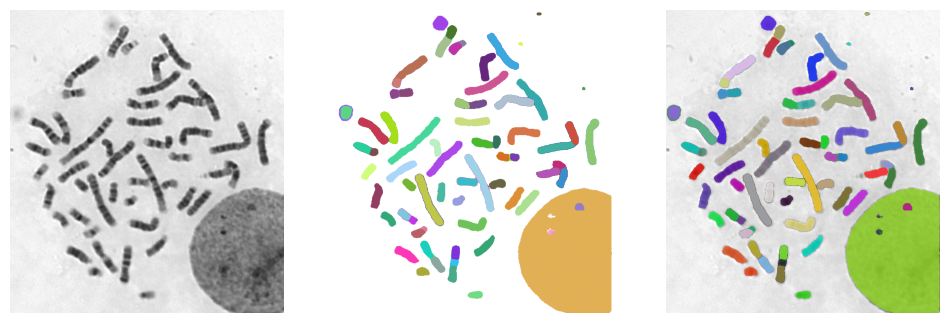

In [9]:
path0='/Users/alirazi/Downloads/Data-2/24_chromosomes_object/JEPG/103064.jpg'
image = cv2.imread(path0)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#image = cv2.resize(image0,dsize=None,fx=0.1,fy=0.1)

masks1 = mask_generator1.generate(image)

fig, axs = plt.subplots(1,3,figsize=(12,4))
axs[0].imshow(image)
axs[2].imshow(image) 
show_anns(masks1,axs[1])
show_anns(masks1,axs[2])
axs[0].axis('off')
axs[1].axis('off')    
axs[2].axis('off')    
plt.show()

In [10]:
bgw=np.ones(image.shape)*255
print(len(masks1))
print(masks1[0].keys())


87
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


(581, 524, 3)


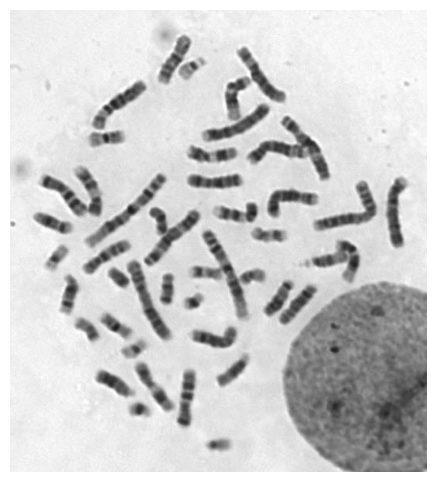

In [11]:
print(image.shape)
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.axis('off') 
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


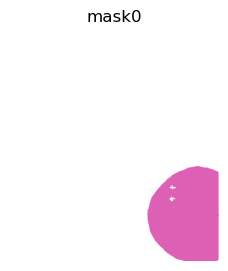

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


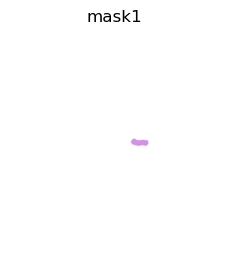

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


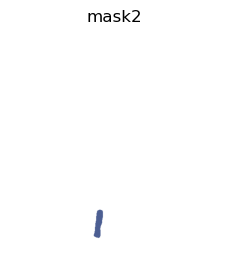

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


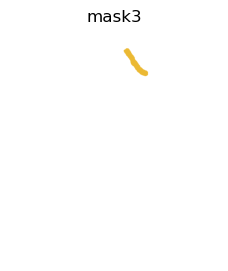

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


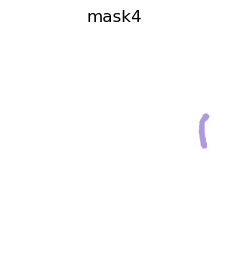

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


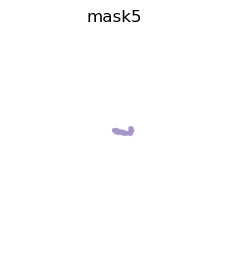

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


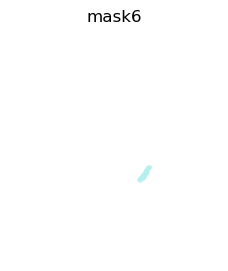

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


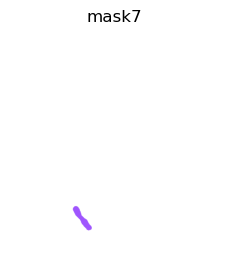

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


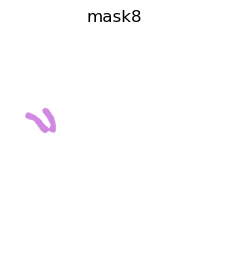

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


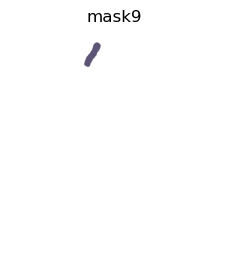

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


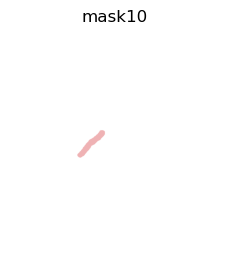

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


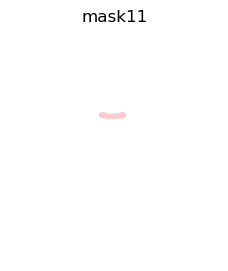

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


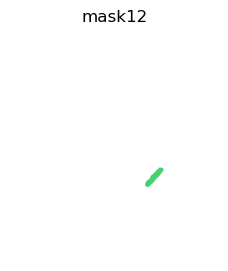

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


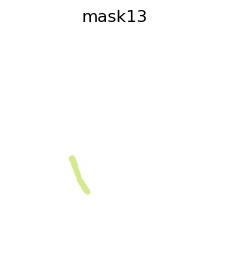

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


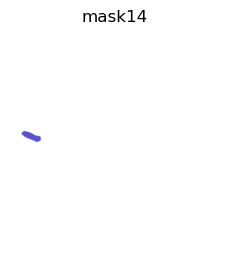

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


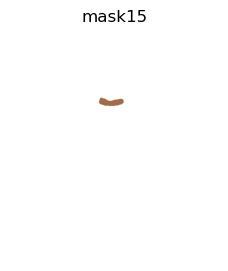

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


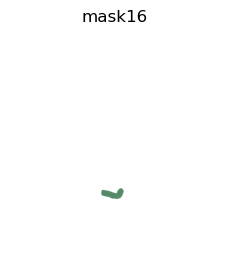

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


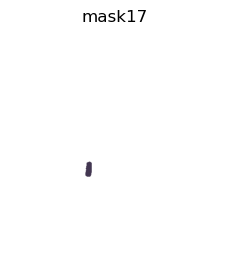

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


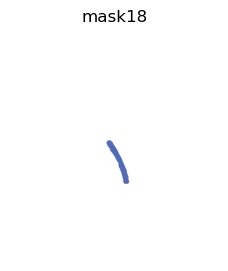

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


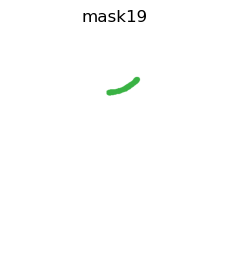

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


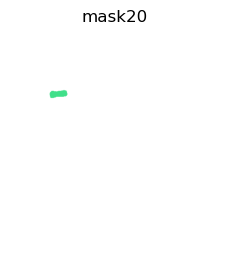

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


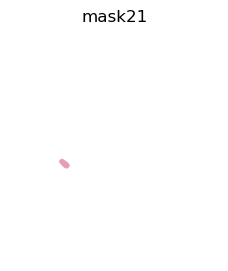

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


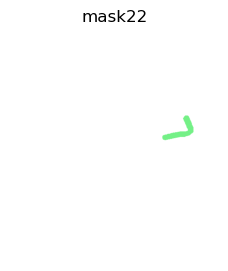

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


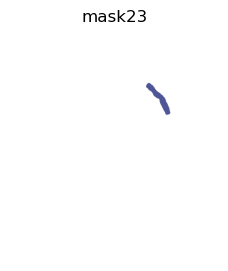

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


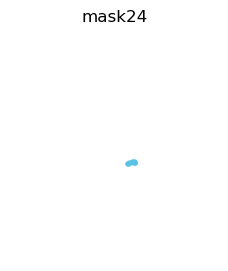

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


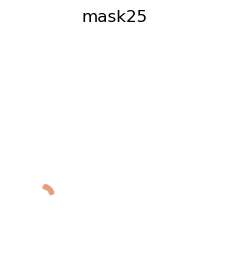

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


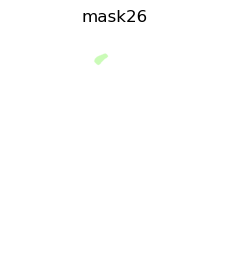

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


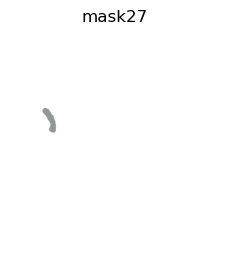

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


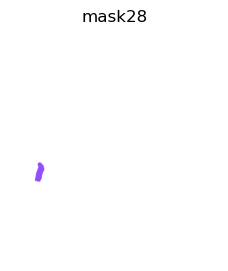

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


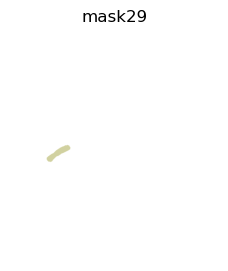

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


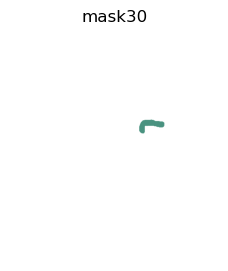

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


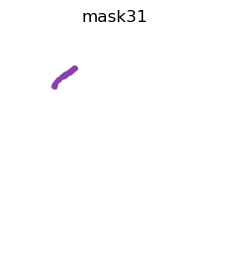

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


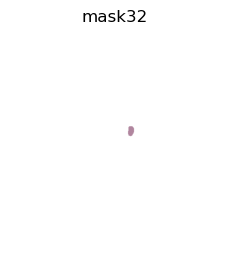

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


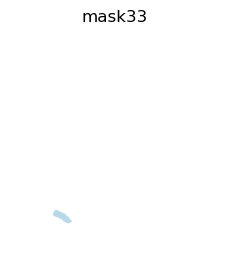

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


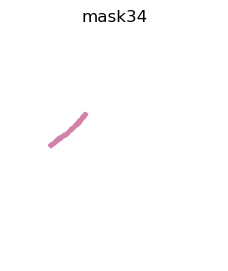

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


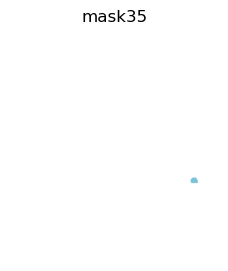

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


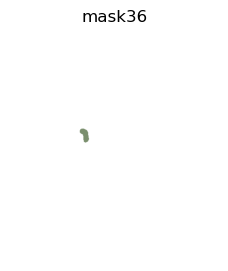

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


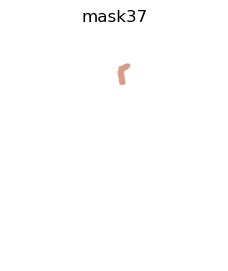

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


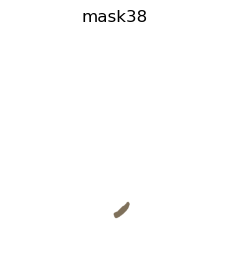

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


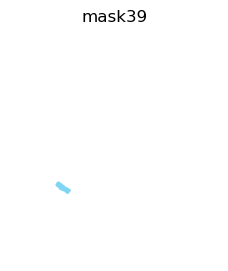

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


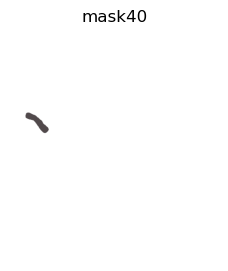

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


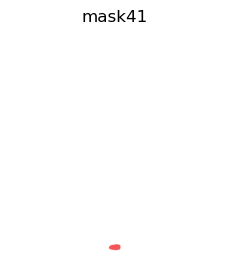

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


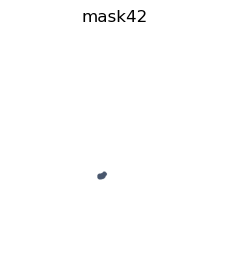

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


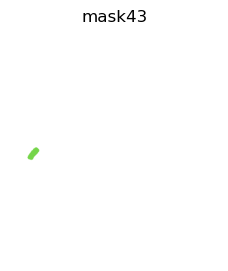

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


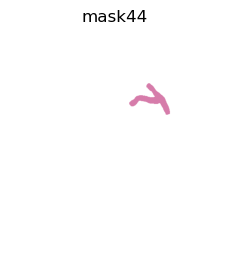

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


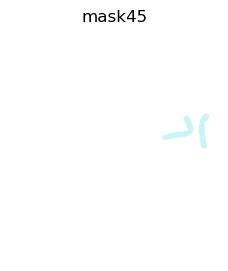

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


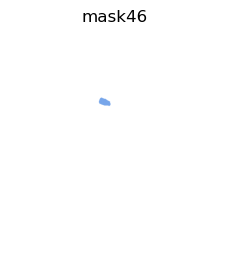

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


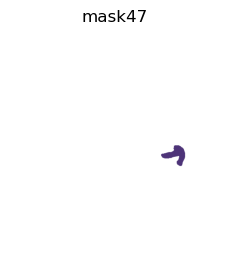

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


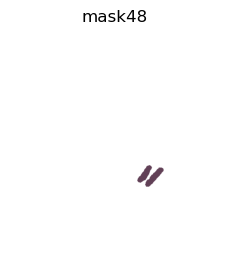

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


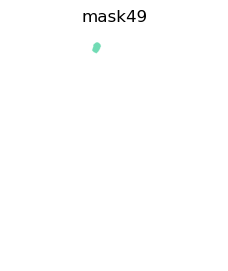

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


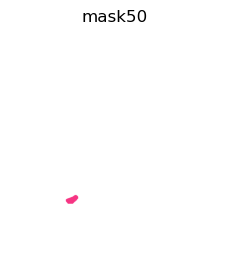

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


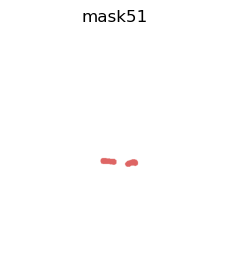

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


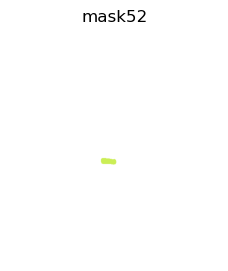

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


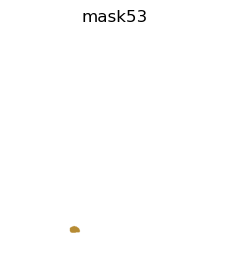

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


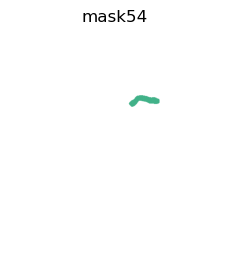

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


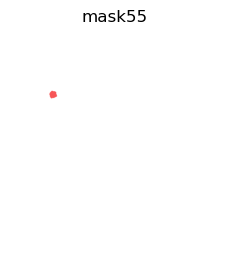

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


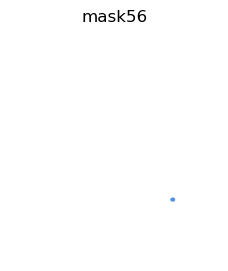

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


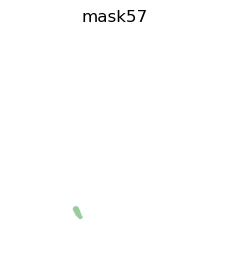

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


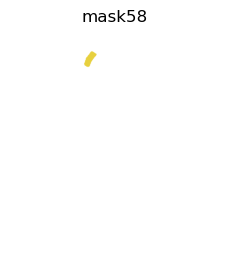

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


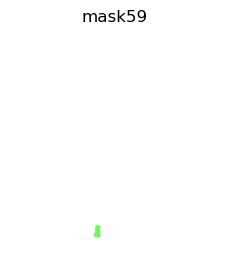

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


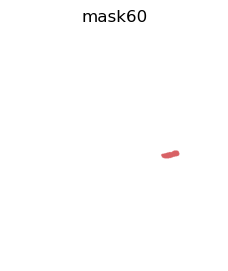

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


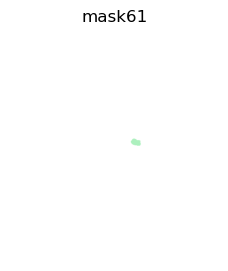

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


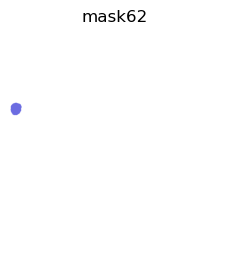

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


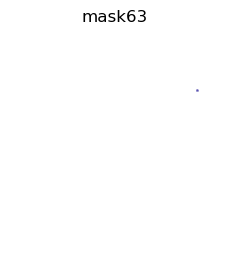

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


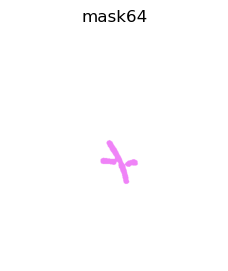

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


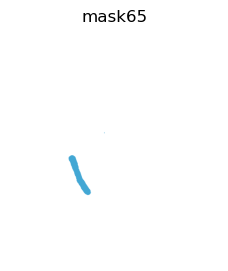

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


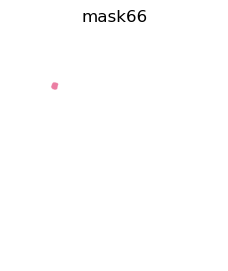

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


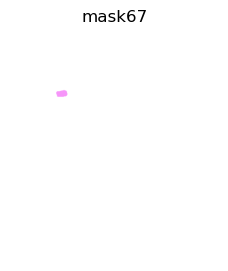

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


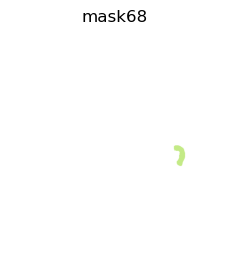

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


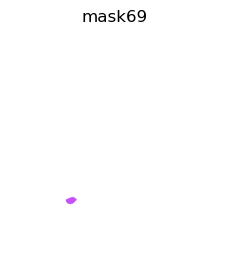

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


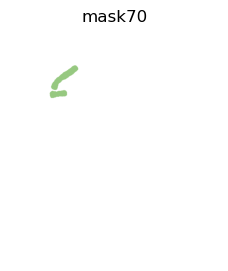

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


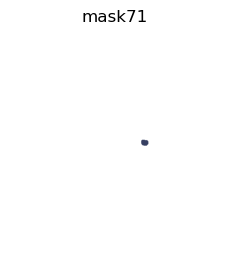

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


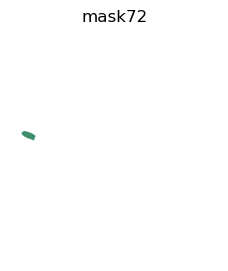

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


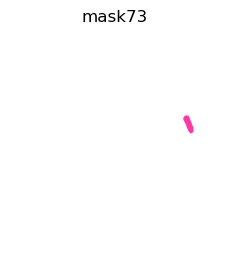

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


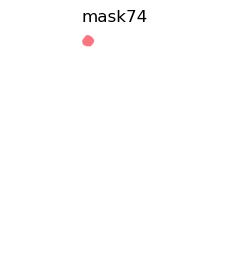

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


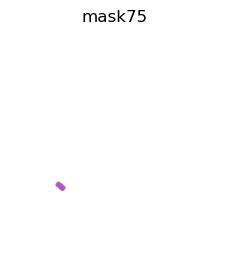

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


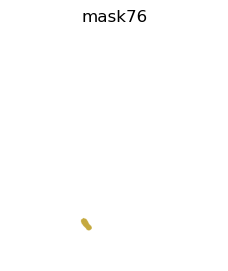

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


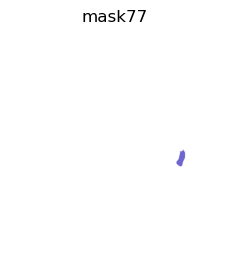

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


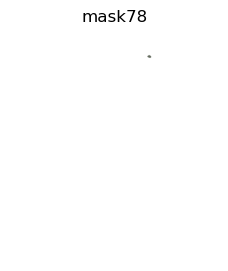

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


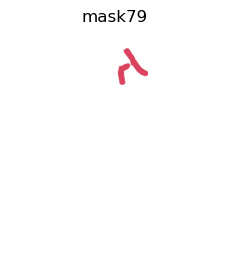

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


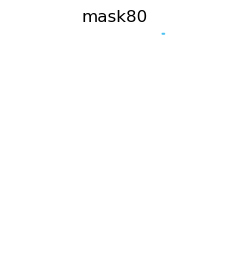

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


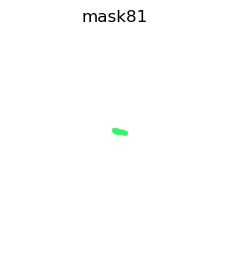

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


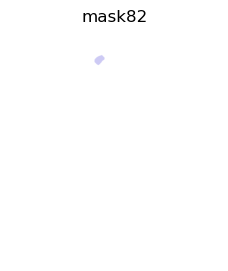

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


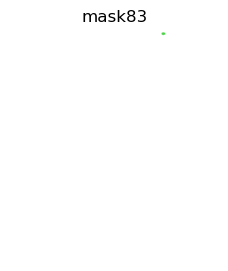

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


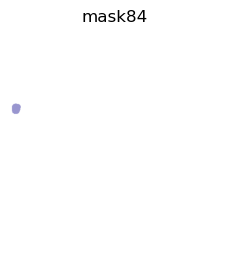

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


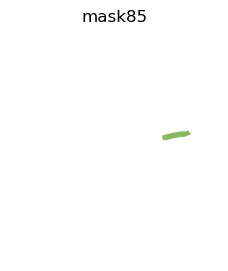

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


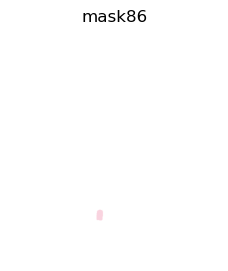

In [12]:
#slices of mask image
for i in range(len(masks1)):
    plt.figure(figsize=(3,3))
    plt.imshow(bgw)
    show_anns([masks1[i]])
    plt.title(f'mask{i}')
    plt.axis('off')  
    plt.show()     

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask0
[344, 342, 179, 238]
[344, 523, 342, 580]


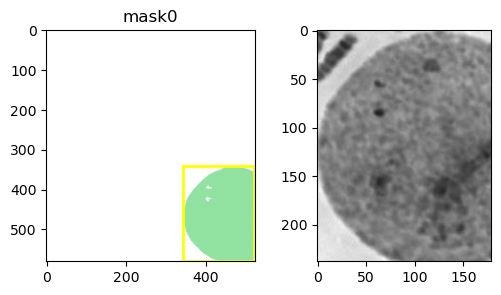

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask1
[303, 273, 43, 18]
[303, 346, 273, 291]


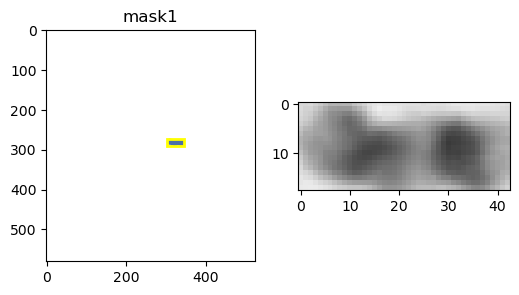

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask2
[210, 452, 22, 70]
[210, 232, 452, 522]


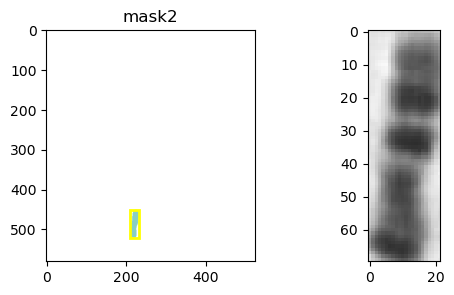

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask3
[285, 46, 60, 69]
[285, 345, 46, 115]


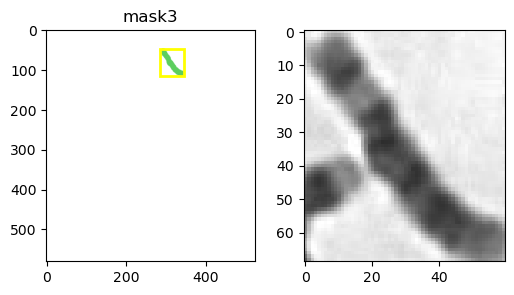

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask4
[473, 209, 26, 89]
[473, 499, 209, 298]


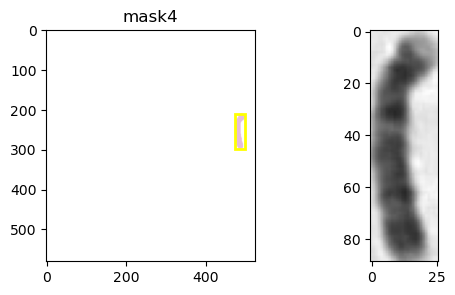

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask5
[256, 242, 54, 24]
[256, 310, 242, 266]


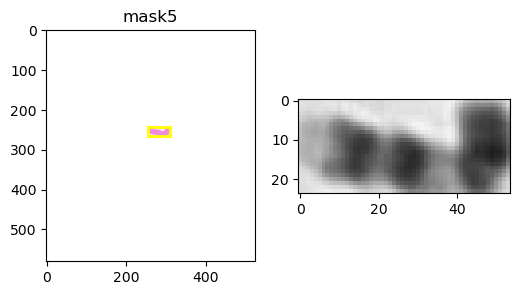

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask6
[319, 340, 36, 43]
[319, 355, 340, 383]


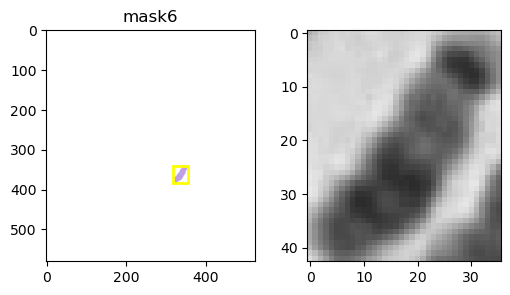

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask7
[157, 443, 47, 60]
[157, 204, 443, 503]


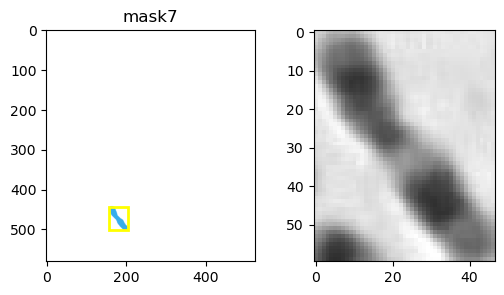

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask8
[38, 196, 76, 62]
[38, 114, 196, 258]


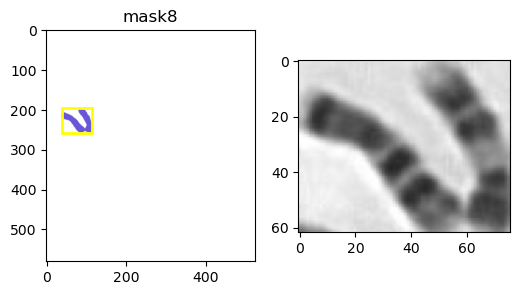

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask9
[186, 31, 41, 61]
[186, 227, 31, 92]


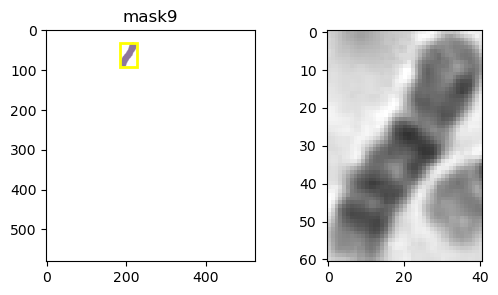

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask10
[169, 252, 68, 68]
[169, 237, 252, 320]


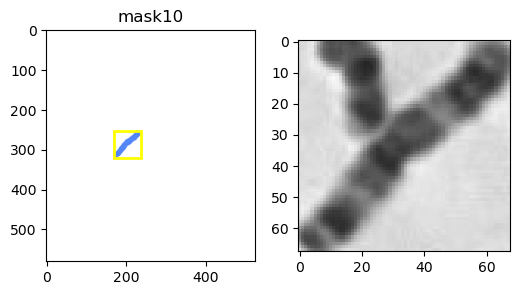

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask11
[223, 206, 67, 17]
[223, 290, 206, 223]


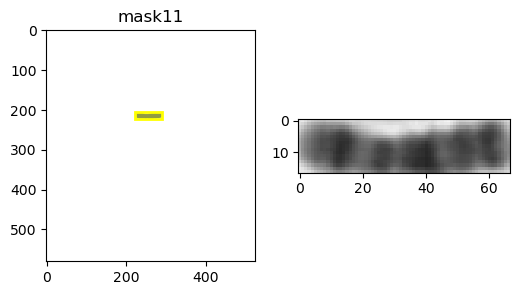

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask12
[339, 346, 45, 48]
[339, 384, 346, 394]


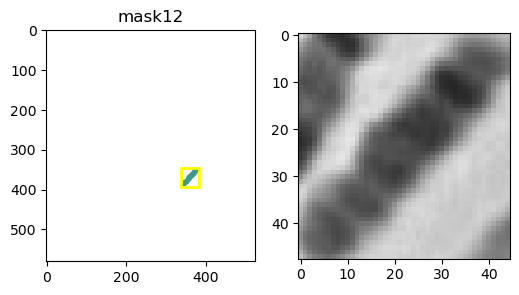

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask13
[147, 315, 54, 98]
[147, 201, 315, 413]


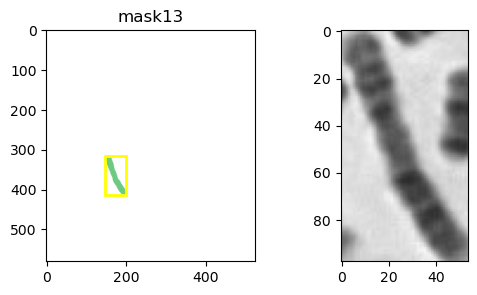

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask14
[29, 254, 48, 26]
[29, 77, 254, 280]


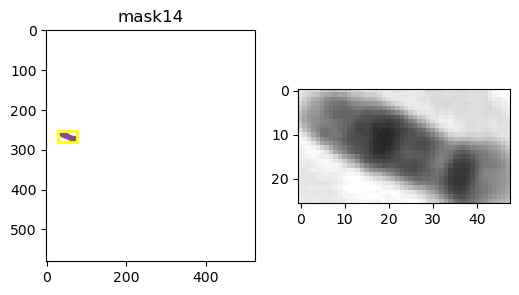

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask15
[223, 170, 61, 20]
[223, 284, 170, 190]


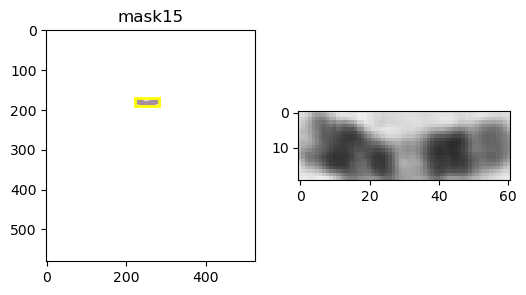

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask16
[229, 398, 55, 26]
[229, 284, 398, 424]


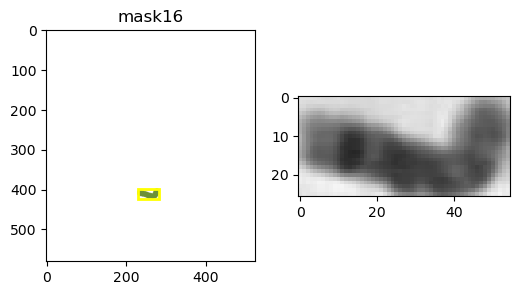

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask17
[189, 331, 15, 37]
[189, 204, 331, 368]


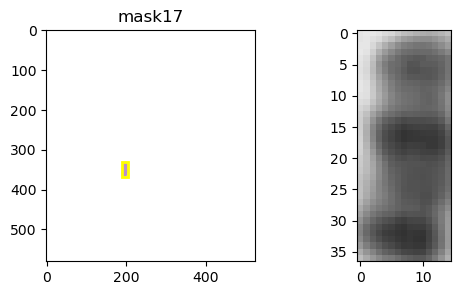

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask18
[242, 277, 56, 109]
[242, 298, 277, 386]


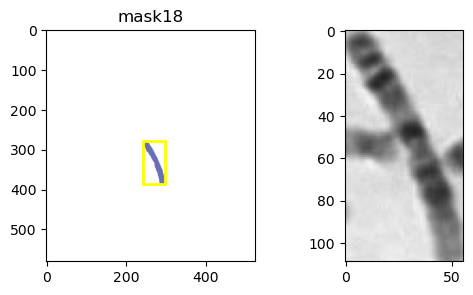

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask19
[242, 118, 83, 46]
[242, 325, 118, 164]


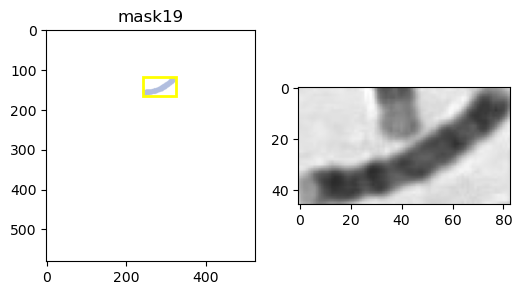

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask20
[99, 151, 44, 19]
[99, 143, 151, 170]


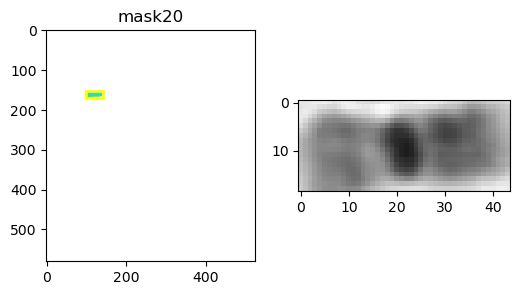

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask21
[123, 324, 26, 24]
[123, 149, 324, 348]


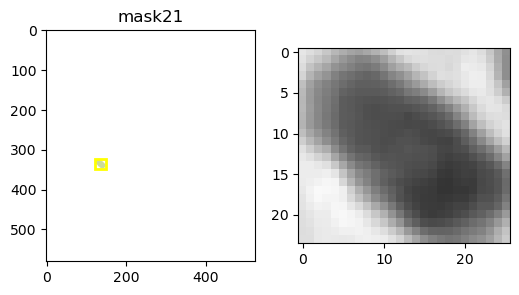

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask22
[382, 215, 77, 61]
[382, 459, 215, 276]


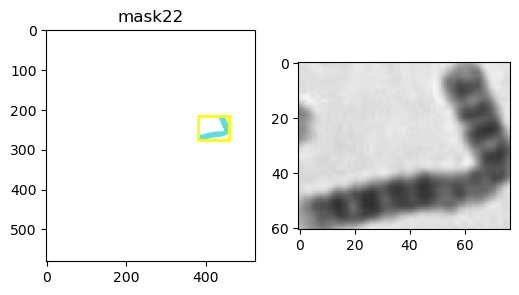

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask23
[341, 133, 60, 79]
[341, 401, 133, 212]


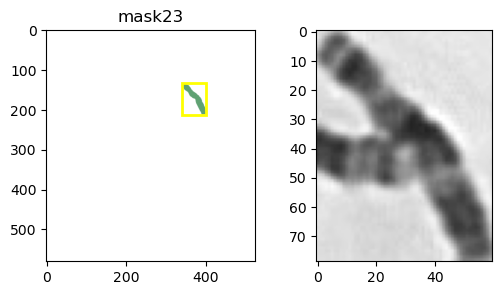

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask24
[289, 325, 31, 18]
[289, 320, 325, 343]


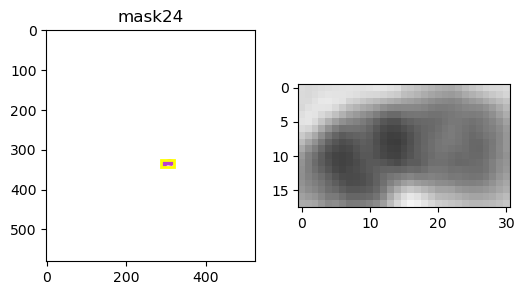

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask25
[81, 387, 29, 28]
[81, 110, 387, 415]


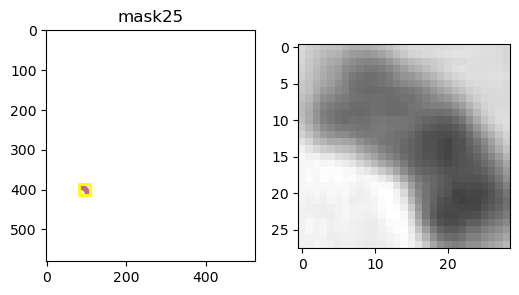

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask26
[211, 59, 34, 28]
[211, 245, 59, 87]


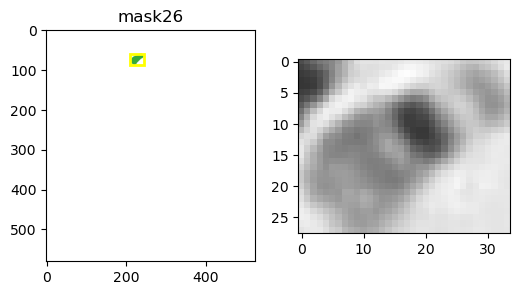

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask27
[81, 196, 34, 61]
[81, 115, 196, 257]


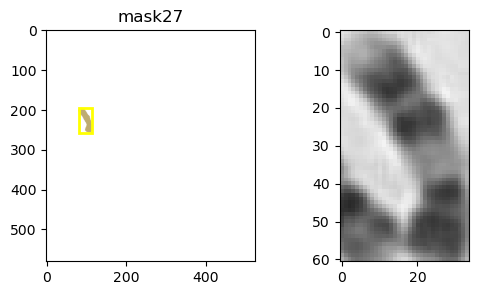

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask28
[62, 333, 23, 48]
[62, 85, 333, 381]


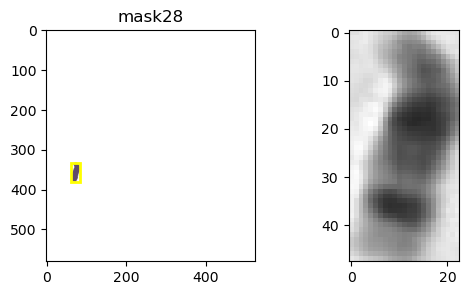

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask29
[92, 289, 59, 42]
[92, 151, 289, 331]


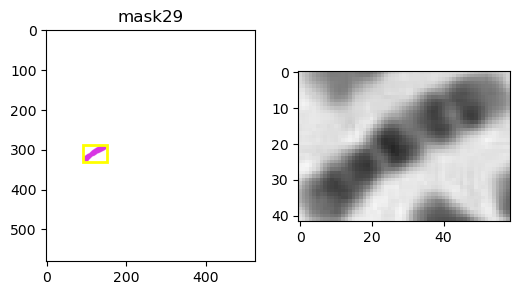

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask30
[324, 225, 62, 34]
[324, 386, 225, 259]


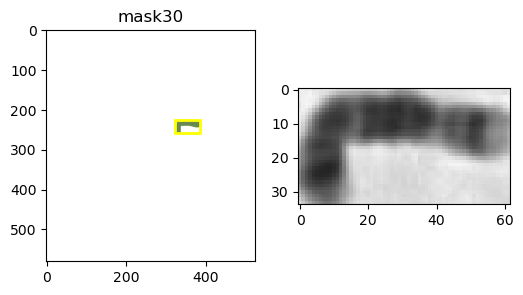

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask31
[103, 89, 67, 60]
[103, 170, 89, 149]


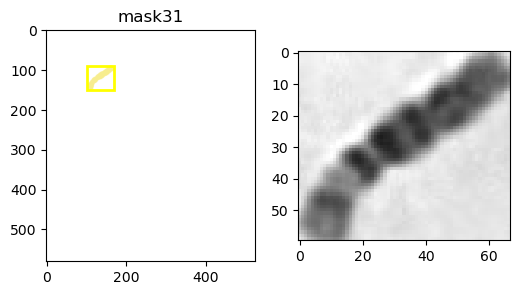

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask32
[296, 242, 14, 24]
[296, 310, 242, 266]


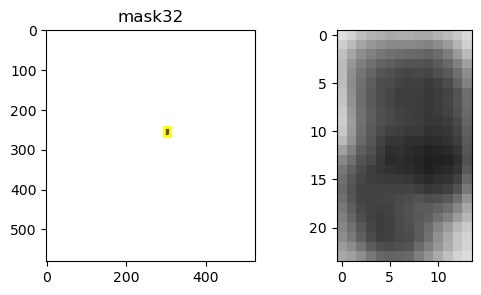

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask33
[108, 453, 46, 32]
[108, 154, 453, 485]


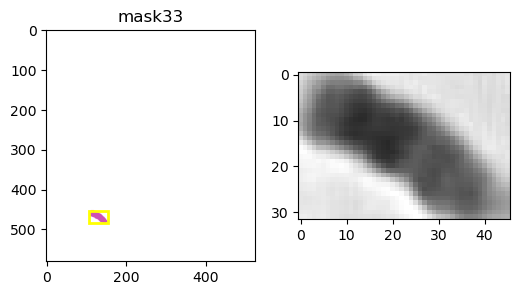

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask34
[95, 206, 100, 91]
[95, 195, 206, 297]


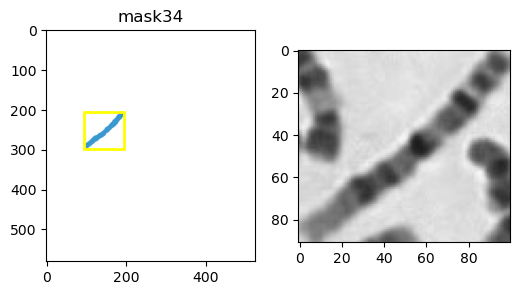

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask35
[453, 371, 17, 13]
[453, 470, 371, 384]


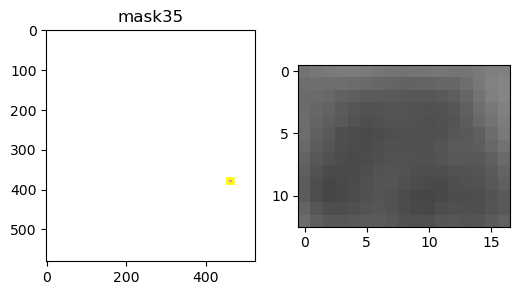

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask36
[175, 248, 22, 34]
[175, 197, 248, 282]


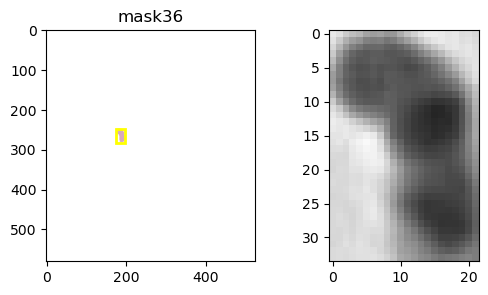

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask37
[270, 84, 31, 53]
[270, 301, 84, 137]


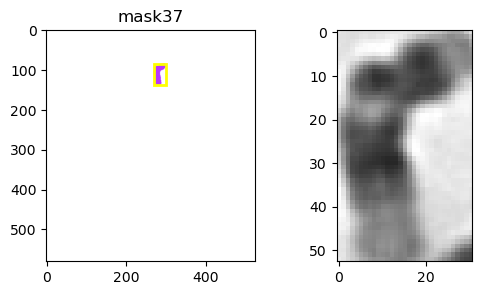

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask38
[260, 432, 39, 40]
[260, 299, 432, 472]


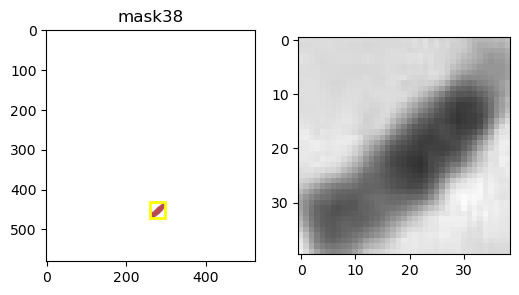

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask39
[114, 381, 38, 30]
[114, 152, 381, 411]


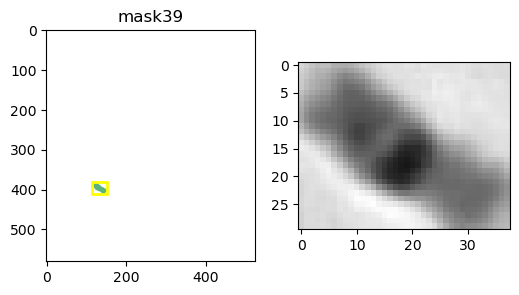

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask40
[39, 207, 57, 51]
[39, 96, 207, 258]


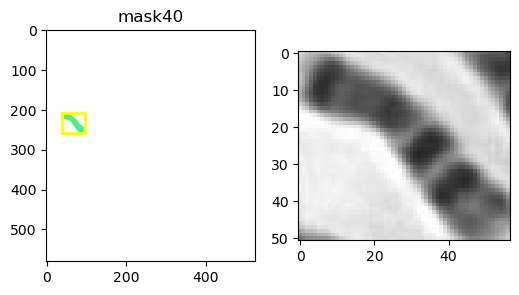

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask41
[248, 539, 28, 14]
[248, 276, 539, 553]


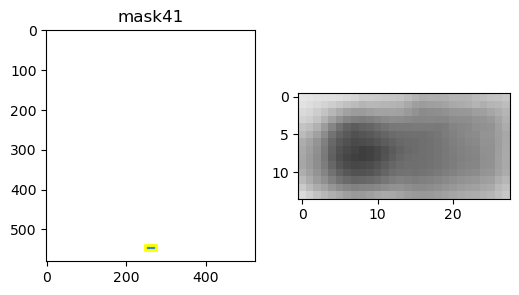

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask42
[219, 356, 23, 19]
[219, 242, 356, 375]


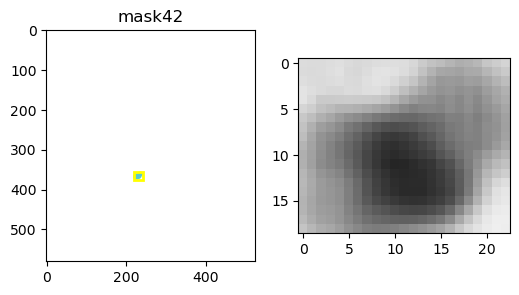

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask43
[44, 295, 29, 31]
[44, 73, 295, 326]


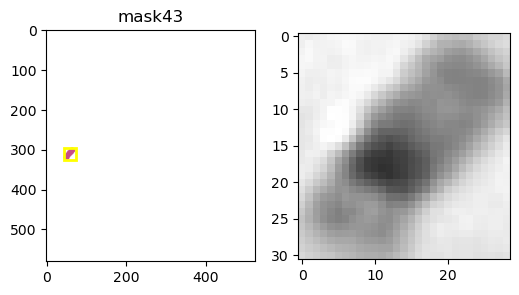

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask44
[299, 134, 101, 78]
[299, 400, 134, 212]


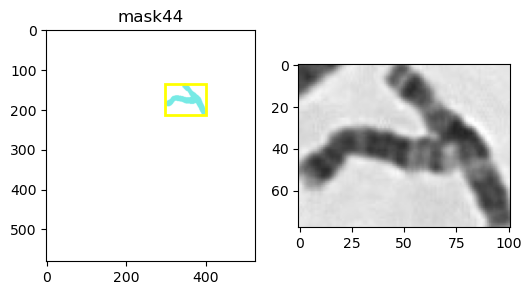

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask45
[382, 210, 116, 87]
[382, 498, 210, 297]


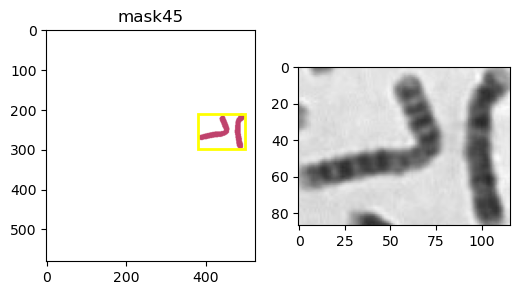

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask46
[223, 170, 28, 20]
[223, 251, 170, 190]


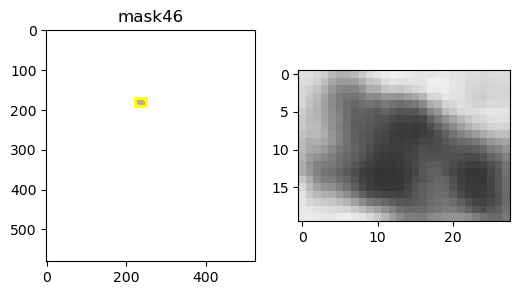

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask47
[379, 290, 59, 51]
[379, 438, 290, 341]


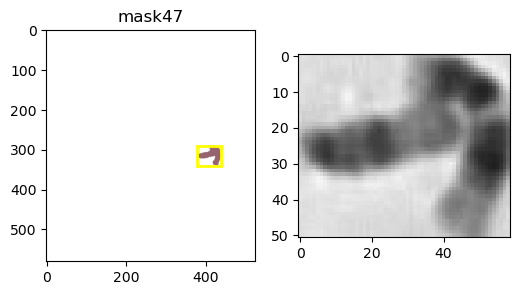

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask48
[319, 340, 65, 53]
[319, 384, 340, 393]


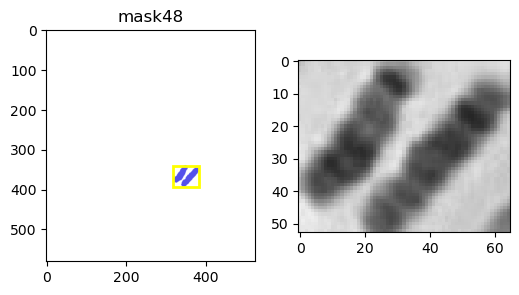

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask49
[206, 31, 21, 27]
[206, 227, 31, 58]


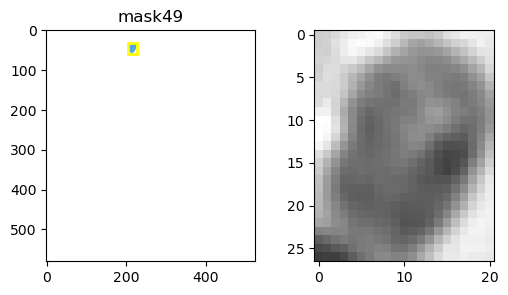

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask50
[140, 415, 30, 21]
[140, 170, 415, 436]


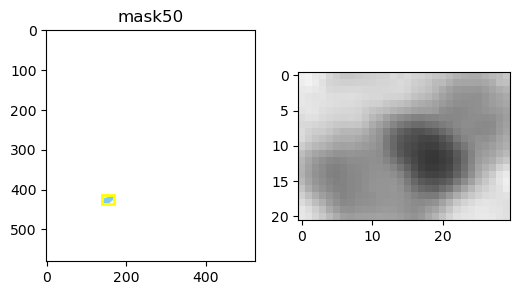

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask51
[227, 322, 93, 21]
[227, 320, 322, 343]


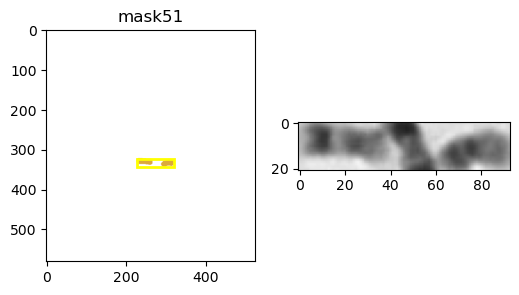

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask52
[228, 322, 38, 16]
[228, 266, 322, 338]


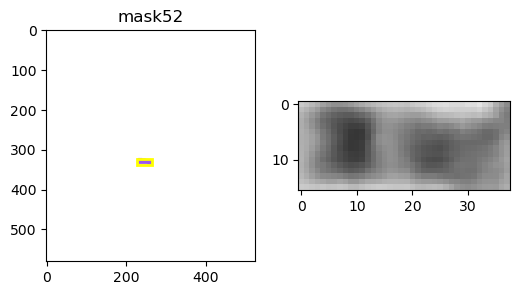

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask53
[150, 493, 25, 16]
[150, 175, 493, 509]


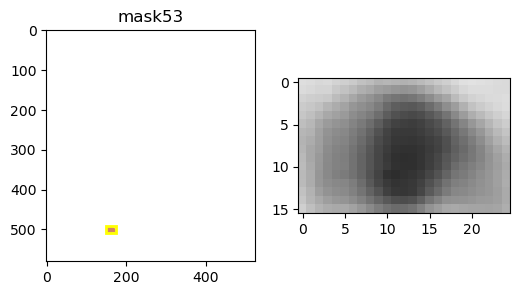

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask54
[298, 164, 76, 28]
[298, 374, 164, 192]


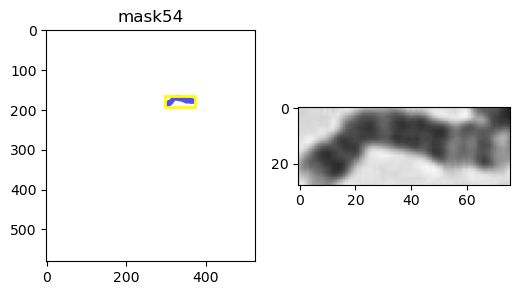

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask55
[99, 153, 18, 18]
[99, 117, 153, 171]


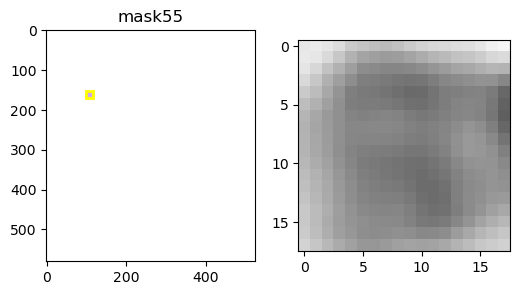

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask56
[402, 421, 11, 10]
[402, 413, 421, 431]


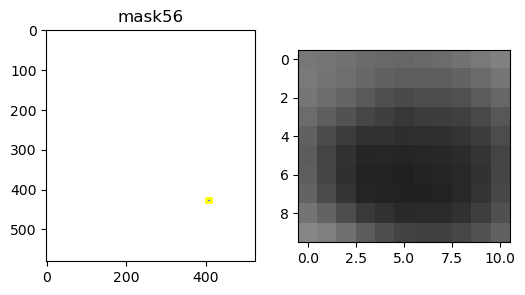

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask57
[157, 443, 24, 32]
[157, 181, 443, 475]


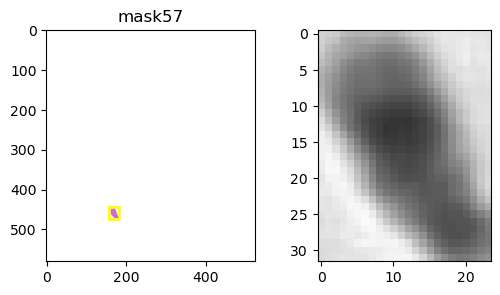

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask58
[186, 53, 30, 39]
[186, 216, 53, 92]


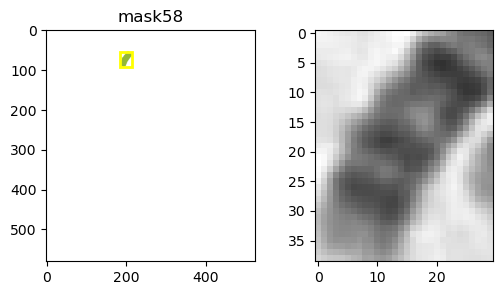

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask59
[210, 490, 16, 32]
[210, 226, 490, 522]


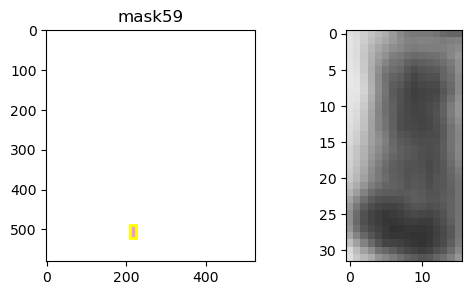

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask60
[379, 303, 45, 19]
[379, 424, 303, 322]


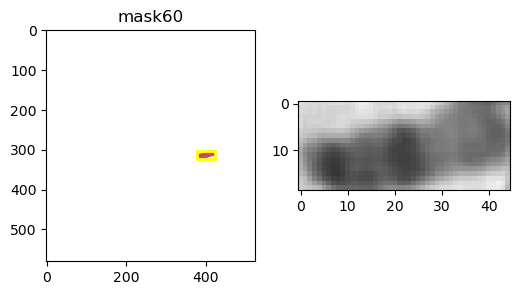

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask61
[303, 273, 24, 17]
[303, 327, 273, 290]


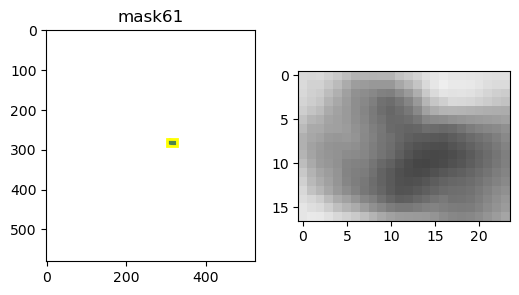

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask62
[1, 183, 27, 30]
[1, 28, 183, 213]


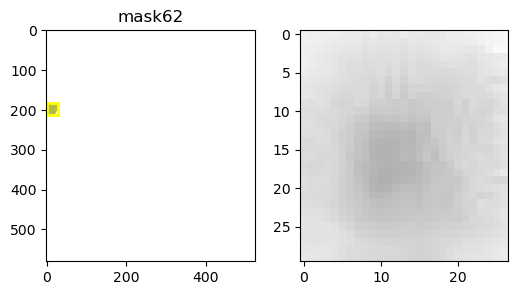

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask63
[467, 149, 5, 5]
[467, 472, 149, 154]


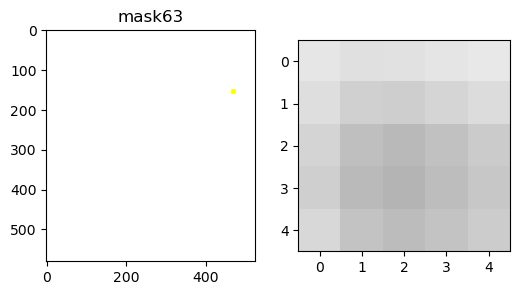

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask64
[227, 277, 93, 109]
[227, 320, 277, 386]


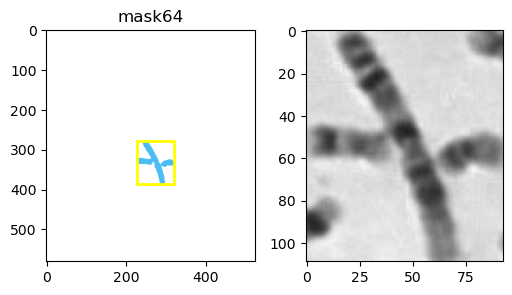

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask65
[147, 257, 89, 157]
[147, 236, 257, 414]


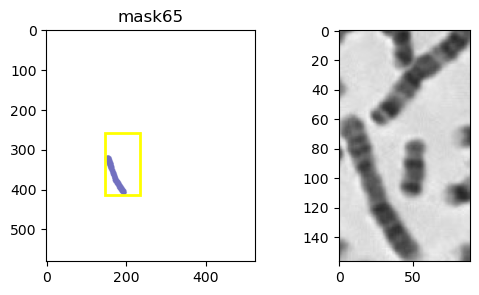

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask66
[103, 131, 17, 18]
[103, 120, 131, 149]


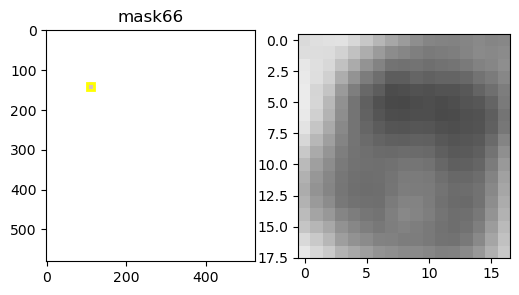

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask67
[116, 151, 27, 16]
[116, 143, 151, 167]


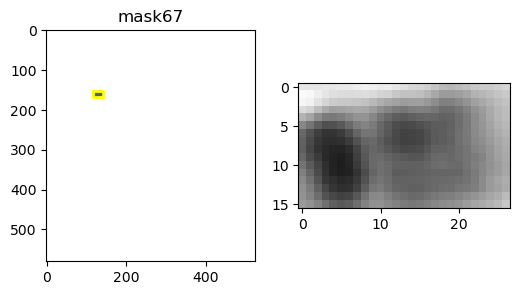

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask68
[411, 290, 27, 51]
[411, 438, 290, 341]


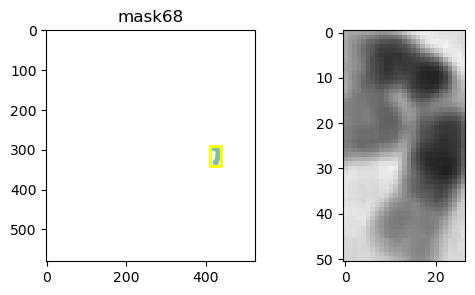

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask69
[140, 420, 26, 17]
[140, 166, 420, 437]


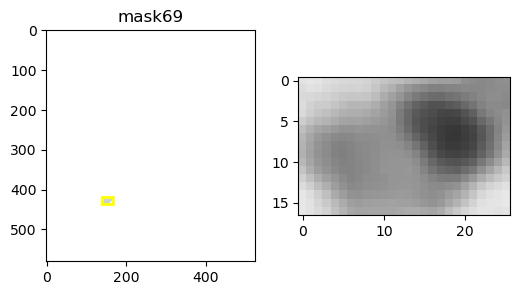

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask70
[99, 89, 71, 81]
[99, 170, 89, 170]


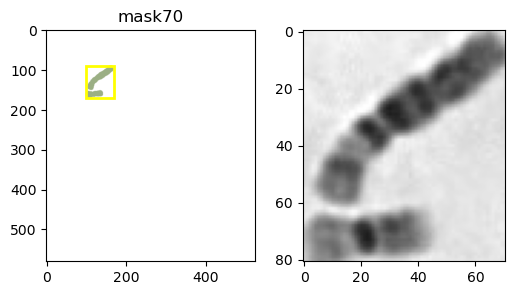

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask71
[329, 276, 17, 14]
[329, 346, 276, 290]


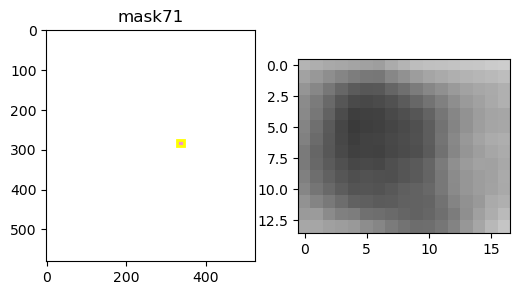

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask72
[29, 254, 34, 22]
[29, 63, 254, 276]


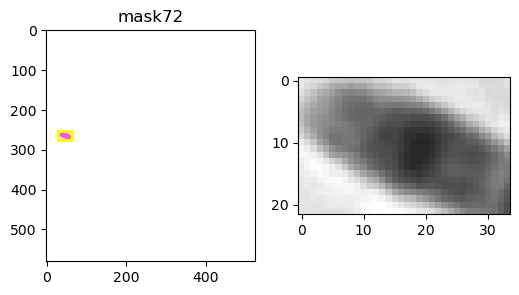

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask73
[434, 215, 25, 44]
[434, 459, 215, 259]


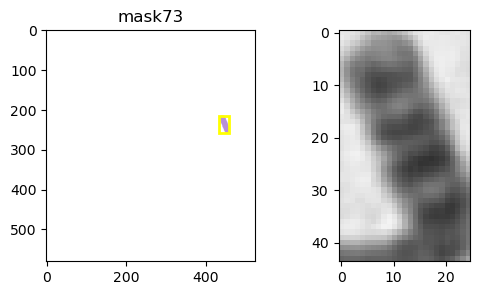

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask74
[181, 13, 29, 27]
[181, 210, 13, 40]


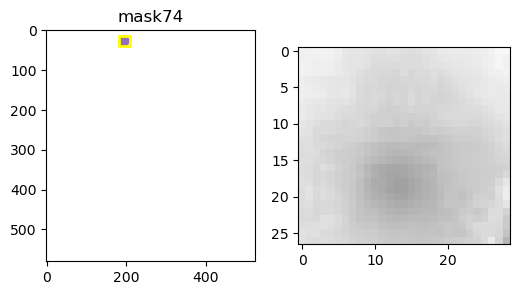

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask75
[114, 381, 25, 23]
[114, 139, 381, 404]


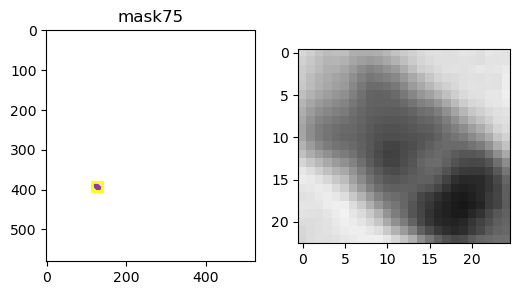

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask76
[178, 473, 26, 30]
[178, 204, 473, 503]


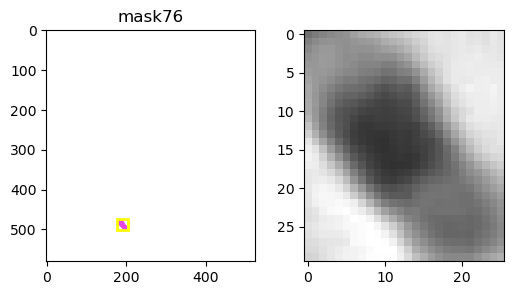

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask77
[417, 300, 21, 42]
[417, 438, 300, 342]


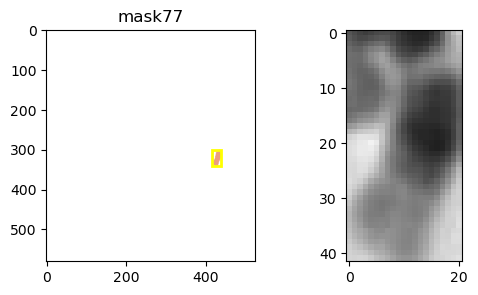

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask78
[344, 63, 9, 6]
[344, 353, 63, 69]


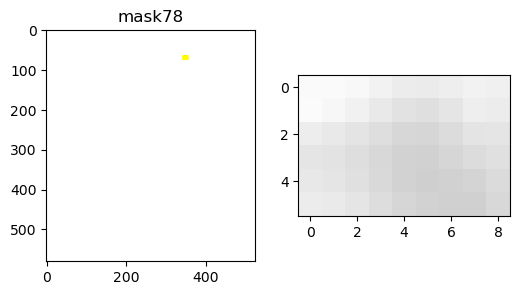

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask79
[270, 45, 75, 92]
[270, 345, 45, 137]


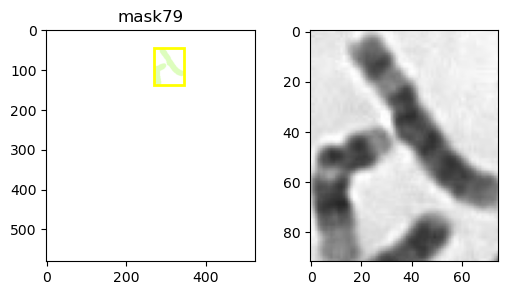

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask80
[380, 7, 8, 4]
[380, 388, 7, 11]


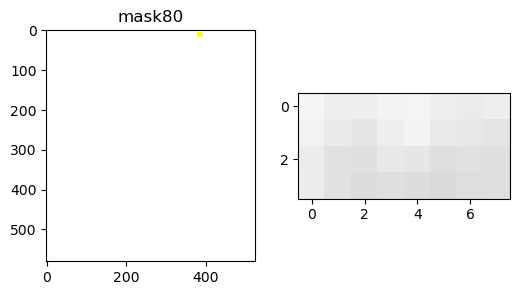

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask81
[255, 246, 40, 19]
[255, 295, 246, 265]


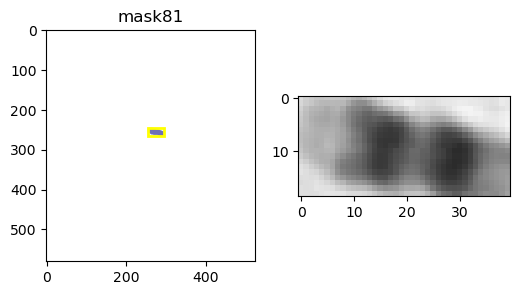

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask82
[212, 63, 24, 24]
[212, 236, 63, 87]


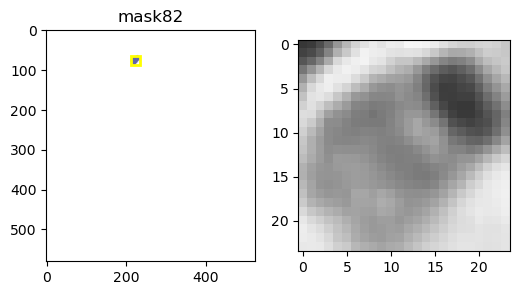

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask83
[380, 6, 9, 6]
[380, 389, 6, 12]


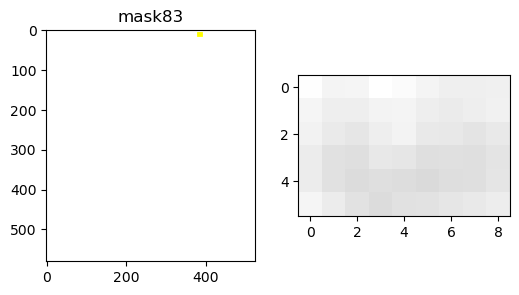

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask84
[5, 185, 21, 25]
[5, 26, 185, 210]


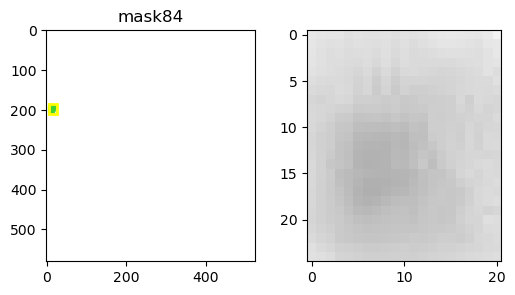

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask85
[381, 253, 72, 23]
[381, 453, 253, 276]


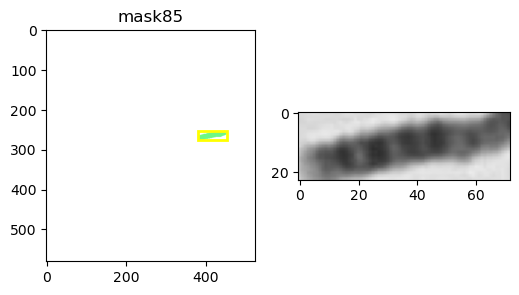

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask86
[217, 452, 15, 26]
[217, 232, 452, 478]


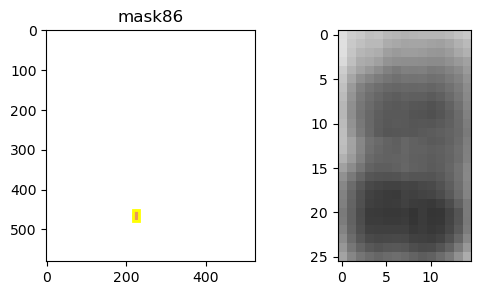

In [13]:
#show slices of masks1
for i in range(len(masks1)):
    fig, ax = plt.subplots(1,2,figsize=(6,3))
    ax[0].imshow(bgw)
    masksi=masks1[i]
    box0=masksi['bbox']
    xc,yc,w,h = box0
    x0=xc
    y0=yc
    x1=xc+w
    y1=yc+h
    print(f'mask{i}')
    print(box0)
    print([x0,x1,y0,y1])
    rect = patches.Rectangle( (xc,yc),w,h, linewidth=2, edgecolor='yellow', fill=False)
    
    boximage=image[y0:y1,x0:x1,:]
    cv2.imwrite(str(i).zfill(3)+'.png', boximage)
    
    show_anns([masksi],ax[0])
    ax[0].add_patch(rect)
    ax[1].imshow(boximage)
    ax[0].set_title(f'mask{i}') 
    plt.show()     

In [14]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
patha0='/Users/alirazi/Downloads/Data-2/24_chromosomes_object/annotations/103064.xml'
image = cv2.imread(path0)
tree = ET.parse(patha0)

In [16]:
for elem in tree.iter():
    if 'object' in elem.tag:
        for attr in list(elem):
            if 'name' in attr.tag:
                name = attr.text
            if 'bndbox' in attr.tag:
                for dim in list(attr):
                    if 'xmin' in dim.tag:
                        xmin = int(round(float(dim.text)))
                    if 'ymin' in dim.tag:
                        ymin = int(round(float(dim.text)))
                    if 'xmax' in dim.tag:
                        xmax = int(round(float(dim.text)))
                    if 'ymax' in dim.tag:
                        ymax = int(round(float(dim.text)))

                cv2.rectangle(image,(xmin,ymin),(xmax,ymax), (255,0,0),1)
                cv2.putText(image,name,(xmin+10, ymin+15),
                        cv2.FONT_HERSHEY_SIMPLEX, 1e-3*image.shape[0],(255,0,0),1)

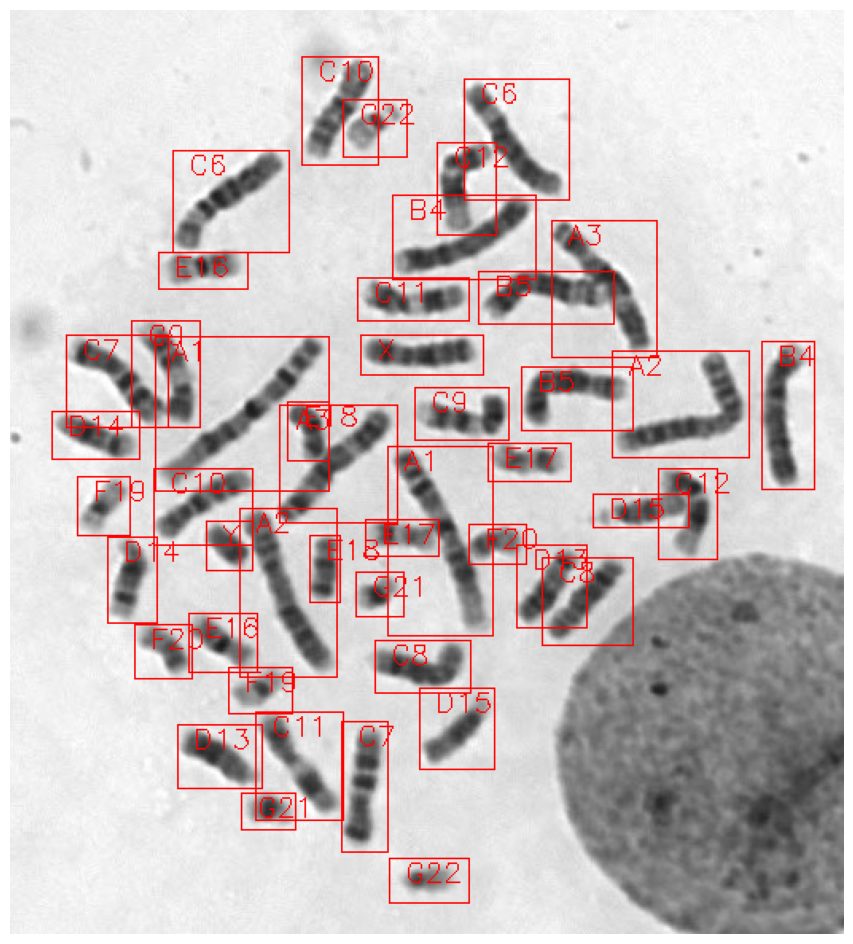

In [17]:
plt.figure(figsize=(12,12))
plt.imshow(image)
plt.axis('off') 
plt.show()

In [19]:
image_path = '/Users/alirazi/Downloads/Data-2/24_chromosomes_object/JEPG/103064.jpg'
preprocessed_image = preprocess_image(image_path)


In [21]:
import cv2

def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    
    # Perform image enhancement and noise reduction as needed

    return image


In [22]:
# Step 2: Chromosome Segmentation
def segment_chromosomes(image):
    # Apply thresholding to separate chromosomes from the background
    _, thresholded = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Use contour detection to find individual chromosomes
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Perform morphological operations on the contours if necessary

    return contours


In [23]:
# Step 3: Feature Extraction
def extract_features(contour):
    # Extract relevant features from the contour, such as area, shape, and intensity
    area = cv2.contourArea(contour)
    # Add more feature extraction code here

    return [area, ...]

In [26]:
# Step 4: Classification
def train_classifier(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train a classifier (e.g., Support Vector Machine)
    classifier = SVC()
    classifier.fit(X_train, y_train)
    
    # Evaluate the classifier
    accuracy = classifier.score(X_test, y_test)
    print("Classifier accuracy:", accuracy)

    return classifier

# Main function
def main():
    # Step 1: Preprocessing
    image_path = '/Users/alirazi/Downloads/Data-2/24_chromosomes_object/JEPG/103064.jpg'
    preprocessed_image = preprocess_image(image_path)
    
   # Step 2: Chromosome Segmentation
def segment_chromosomes(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding to separate chromosomes from the background using the OTSU method
    _, thresholded = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Use contour detection to find individual chromosomes
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Perform morphological operations on the contours if necessary

    return contours

    # Step 3: Feature Extraction
    feature_data = []
    for contour in contours:
        features = extract_features(contour)
        feature_data.append(features)
    
    # Labels (you need to specify these based on your dataset)
    labels = [1, 2, 3, ...]  # Replace with actual chromosome labels

    # Step 4: Classification
    classifier = train_classifier(feature_data, labels)

if __name__ == "__main__":
    main()

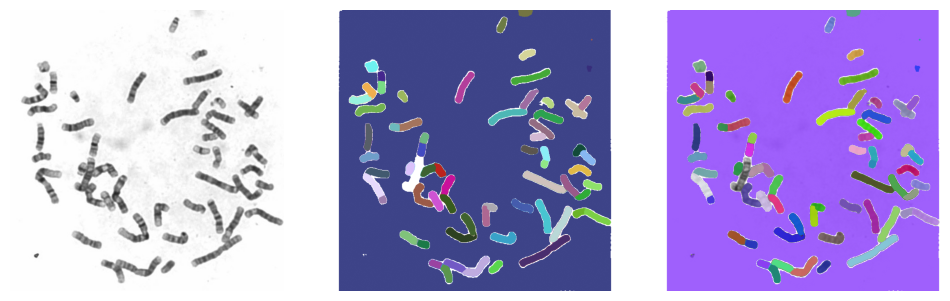

In [36]:
path1='/Users/alirazi/Downloads/Data-2/24_chromosomes_object/JEPG/103131.jpg'
image = cv2.imread(path0)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#image = cv2.resize(image0,dsize=None,fx=0.1,fy=0.1)

masks1 = mask_generator1.generate(image)

fig, axs = plt.subplots(1,3,figsize=(12,4))
axs[0].imshow(image)
axs[2].imshow(image) 
show_anns(masks1,axs[1])
show_anns(masks1,axs[2])
axs[0].axis('off')
axs[1].axis('off')    
axs[2].axis('off')    
plt.show()

In [37]:
bgw=np.ones(image.shape)*255
print(len(masks1))
print(masks1[0].keys())


89
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


(625, 608, 3)


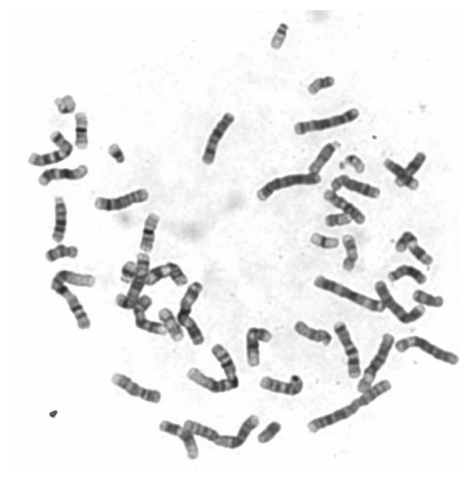

In [38]:
print(image.shape)
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.axis('off') 
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


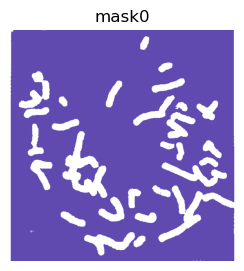

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


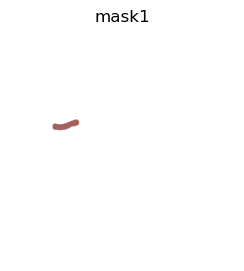

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


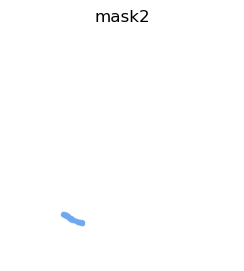

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


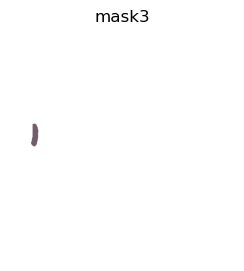

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


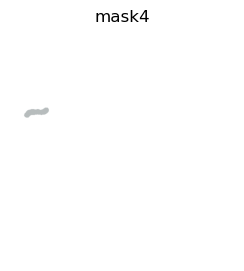

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


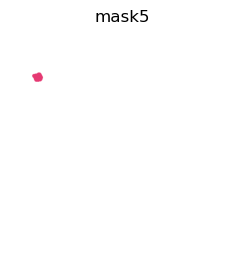

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


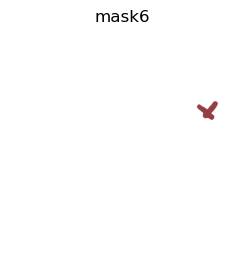

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


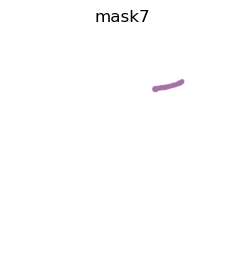

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


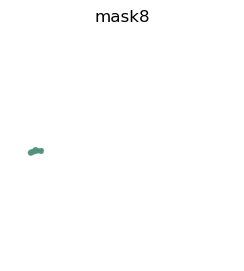

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


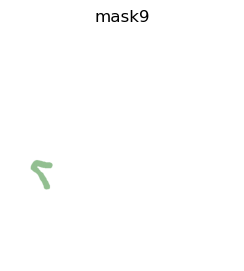

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


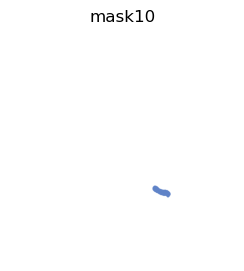

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


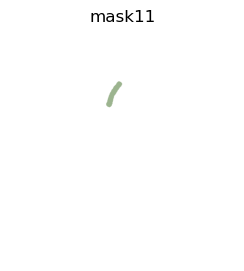

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


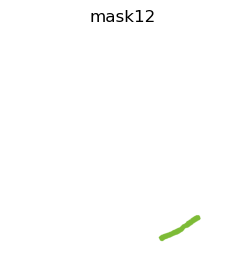

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


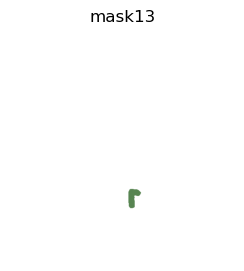

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


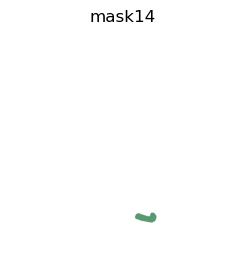

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


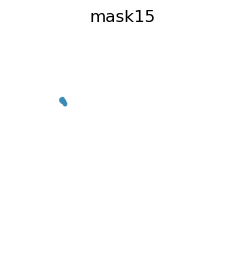

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


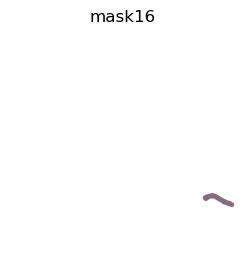

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


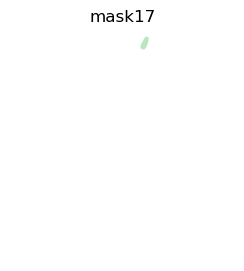

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


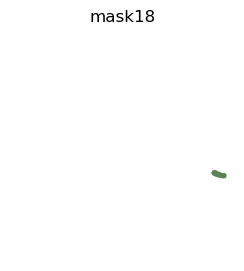

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


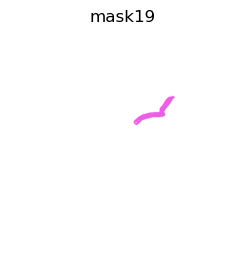

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


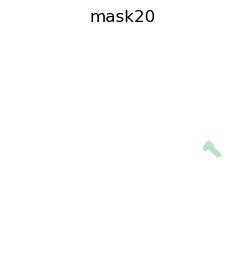

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


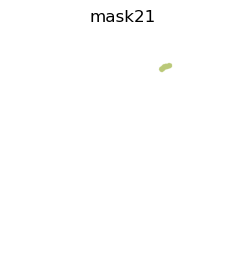

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


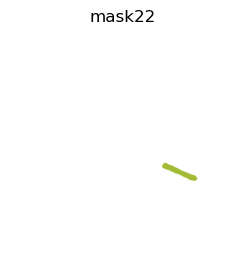

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


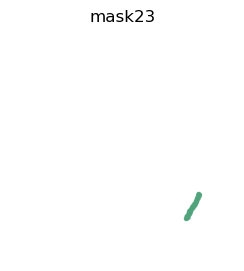

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


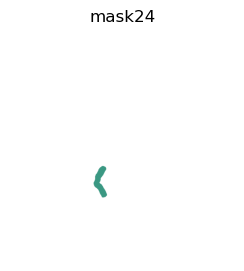

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


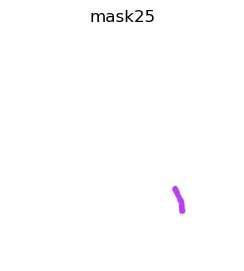

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


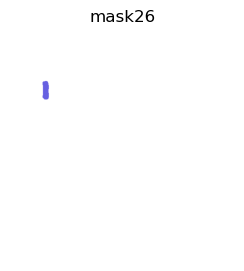

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


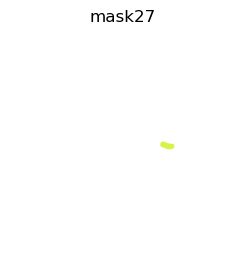

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


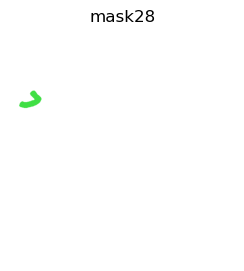

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


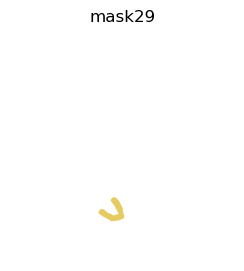

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


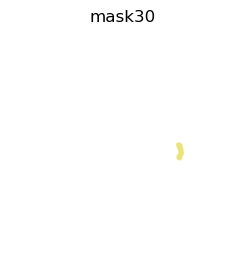

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


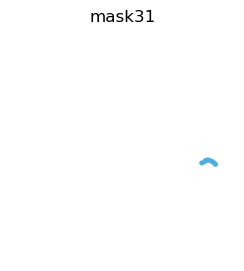

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


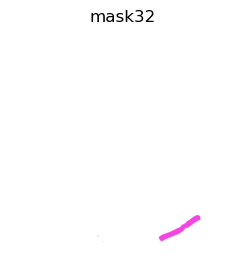

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


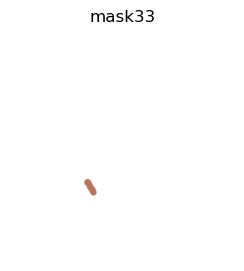

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


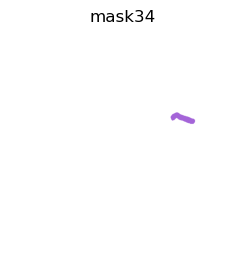

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


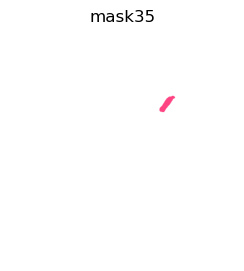

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


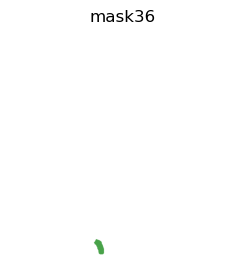

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


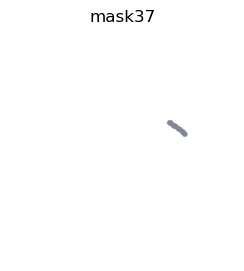

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


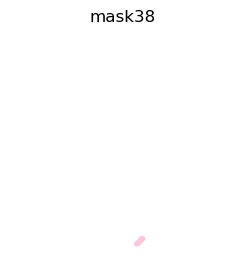

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


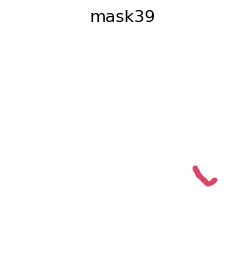

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


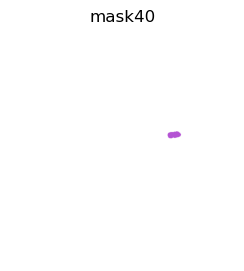

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


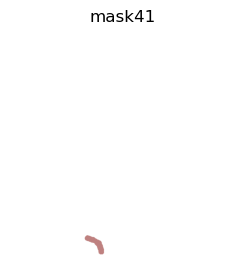

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


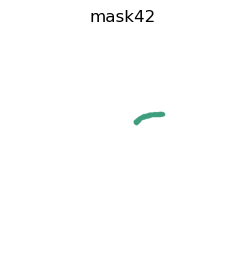

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


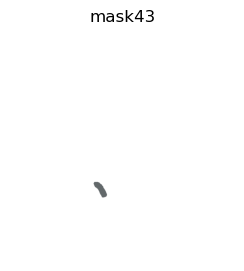

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


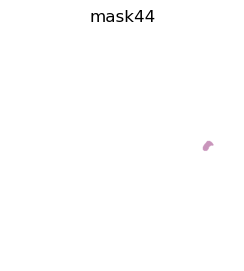

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


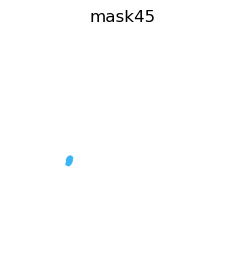

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


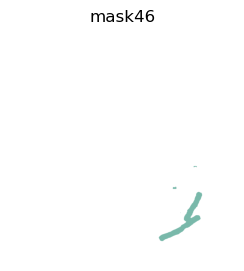

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


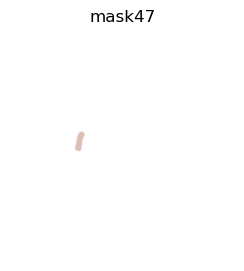

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


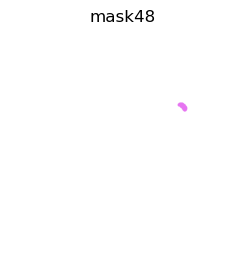

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


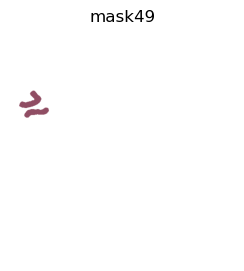

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


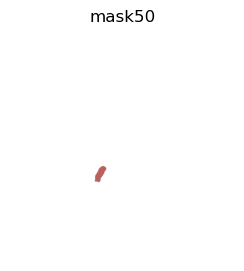

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


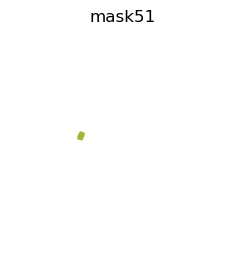

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


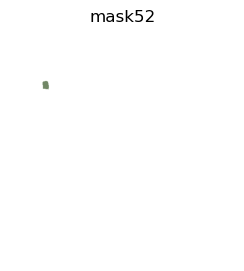

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


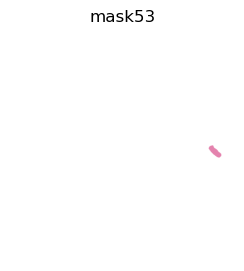

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


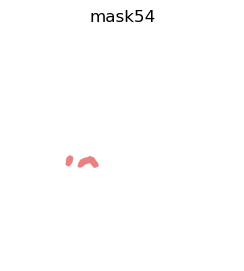

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


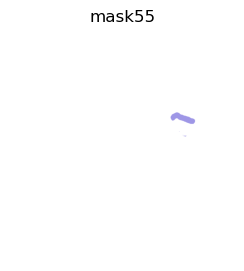

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


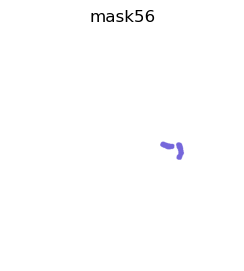

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


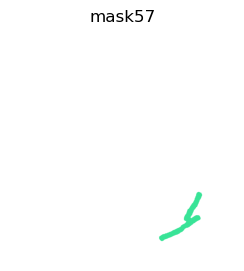

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


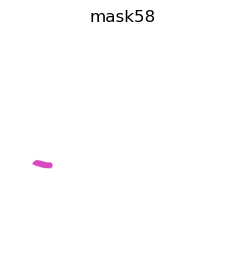

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


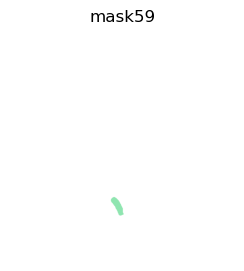

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


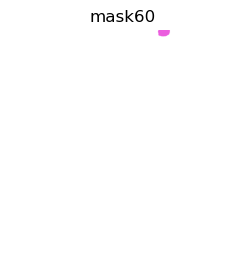

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


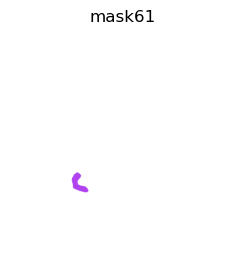

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


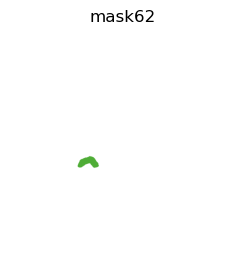

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


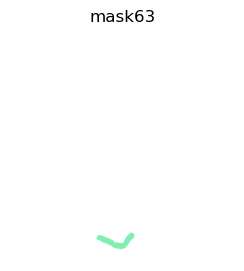

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


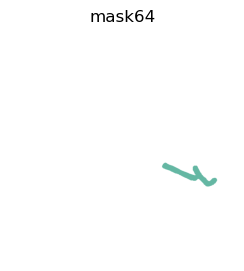

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


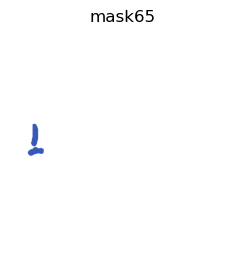

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


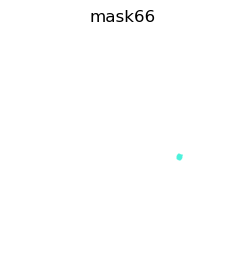

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


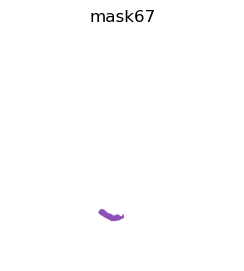

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


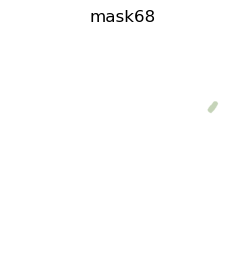

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


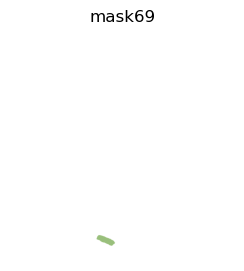

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


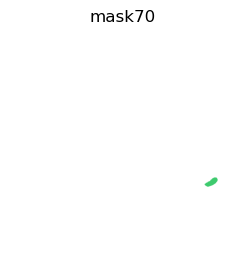

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


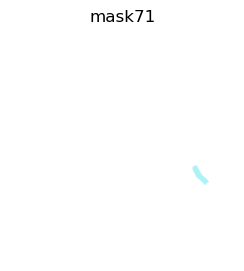

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


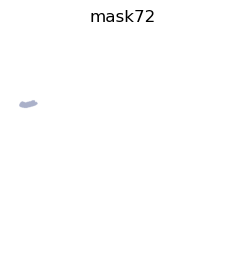

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


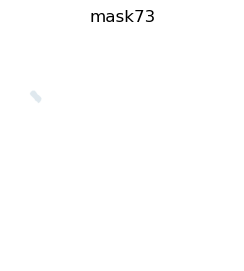

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


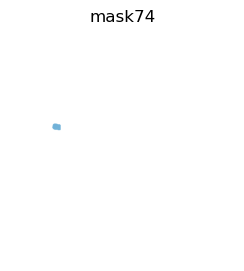

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


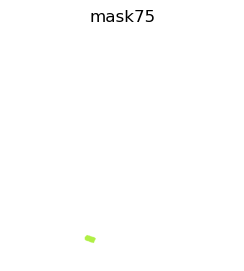

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


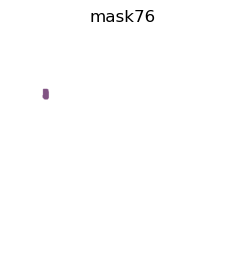

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


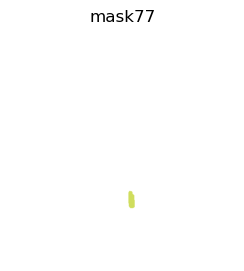

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


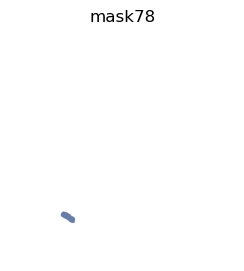

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


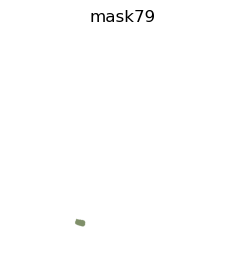

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


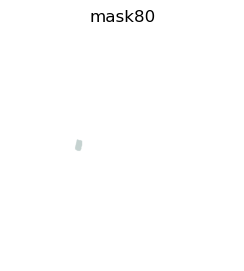

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


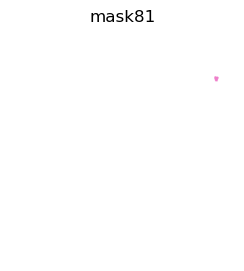

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


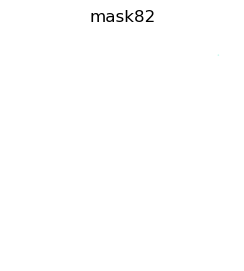

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


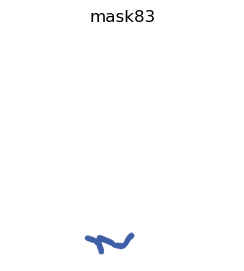

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


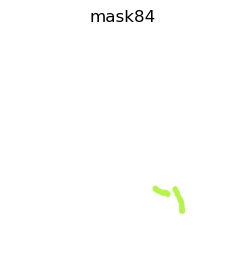

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


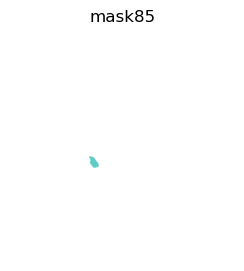

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


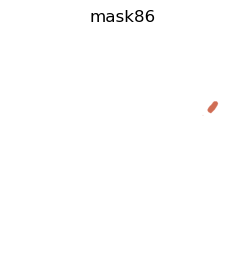

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


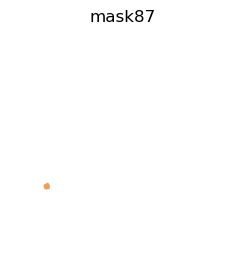

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


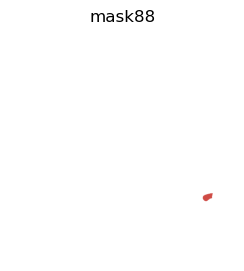

In [39]:
#slices of mask image
for i in range(len(masks1)):
    plt.figure(figsize=(3,3))
    plt.imshow(bgw)
    show_anns([masks1[i]])
    plt.title(f'mask{i}')
    plt.axis('off')  
    plt.show()  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask0
[2, 0, 603, 624]
[2, 605, 0, 624]


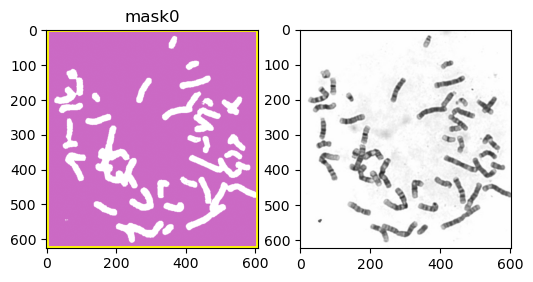

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask1
[115, 242, 71, 28]
[115, 186, 242, 270]


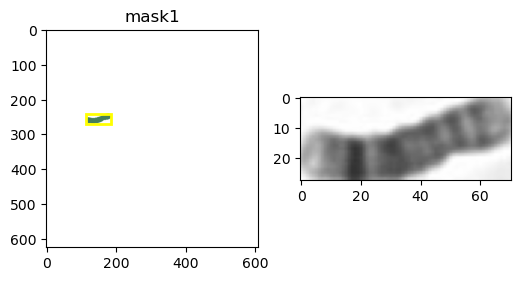

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask2
[137, 491, 65, 39]
[137, 202, 491, 530]


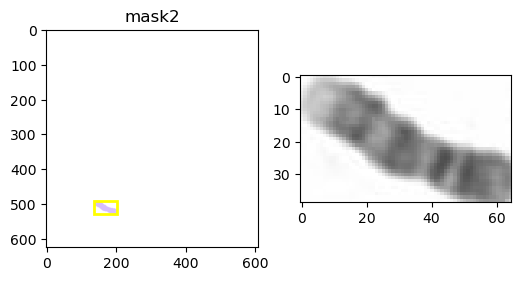

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask3
[57, 253, 19, 61]
[57, 76, 253, 314]


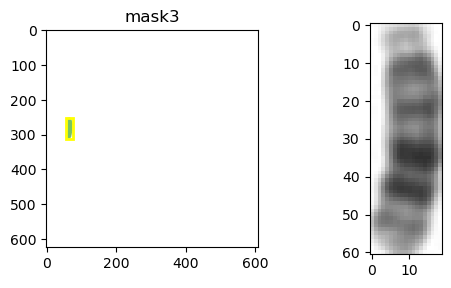

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask4
[38, 210, 66, 26]
[38, 104, 210, 236]


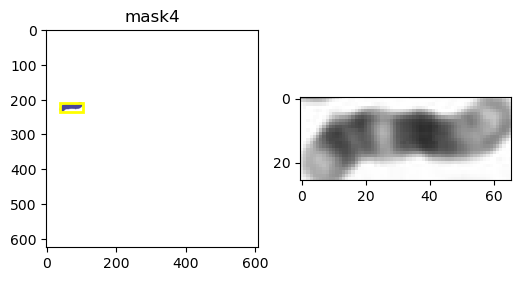

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask5
[60, 115, 28, 24]
[60, 88, 115, 139]


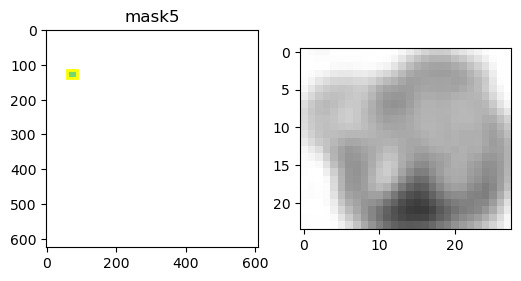

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask6
[505, 193, 56, 49]
[505, 561, 193, 242]


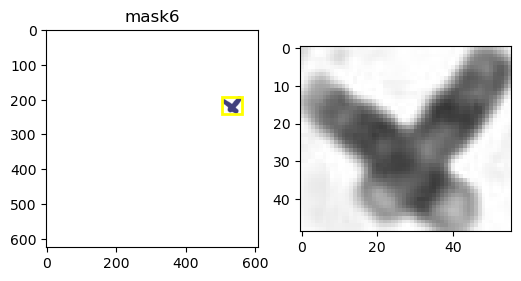

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask7
[384, 133, 86, 34]
[384, 470, 133, 167]


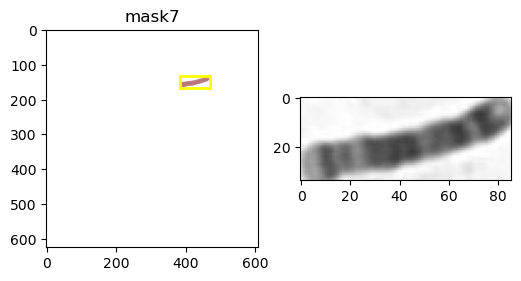

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask8
[48, 317, 43, 22]
[48, 91, 317, 339]


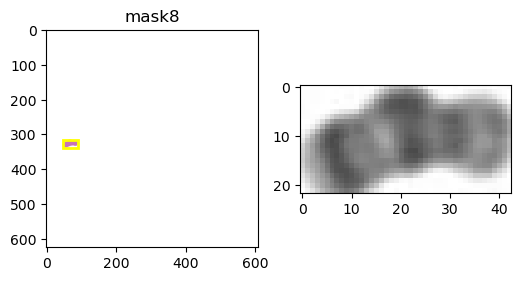

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask9
[56, 352, 58, 79]
[56, 114, 352, 431]


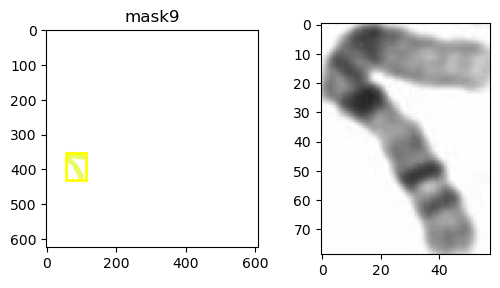

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask10
[385, 421, 48, 31]
[385, 433, 421, 452]


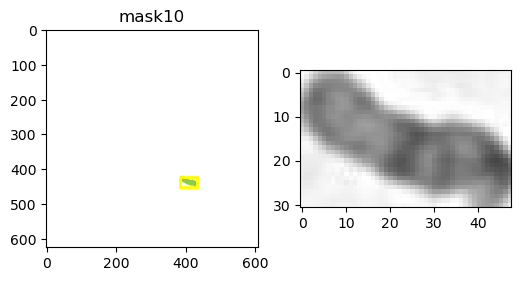

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask11
[260, 139, 42, 69]
[260, 302, 139, 208]


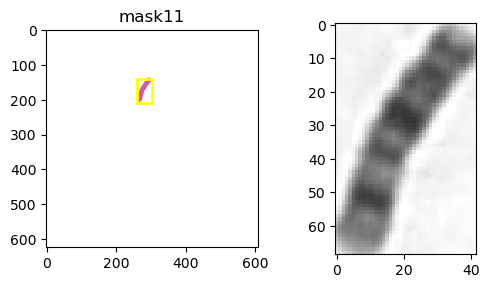

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask12
[402, 501, 112, 69]
[402, 514, 501, 570]


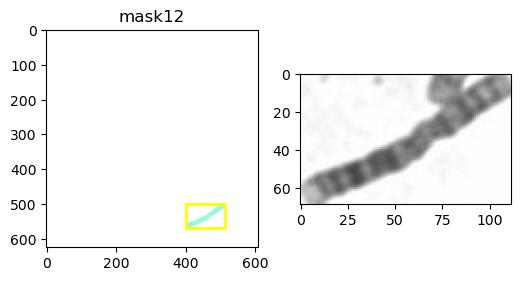

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask13
[320, 430, 33, 51]
[320, 353, 430, 481]


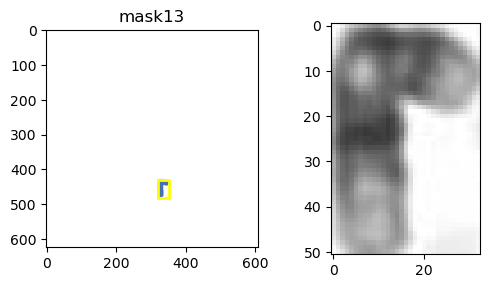

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask14
[338, 494, 57, 26]
[338, 395, 494, 520]


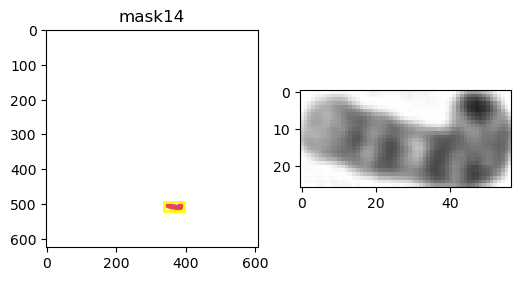

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask15
[133, 181, 21, 25]
[133, 154, 181, 206]


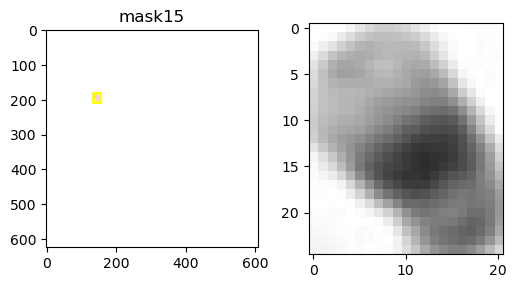

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask16
[521, 441, 84, 37]
[521, 605, 441, 478]


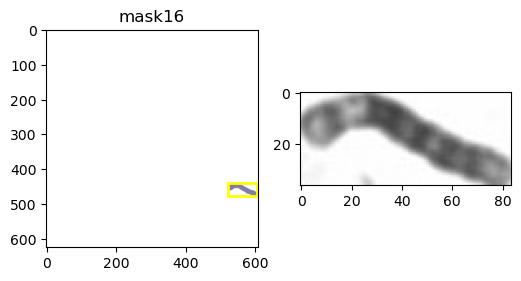

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask17
[352, 18, 22, 34]
[352, 374, 18, 52]


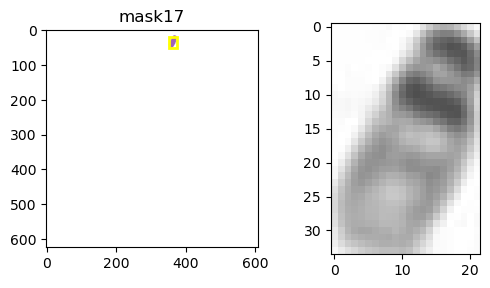

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask18
[544, 378, 40, 23]
[544, 584, 378, 401]


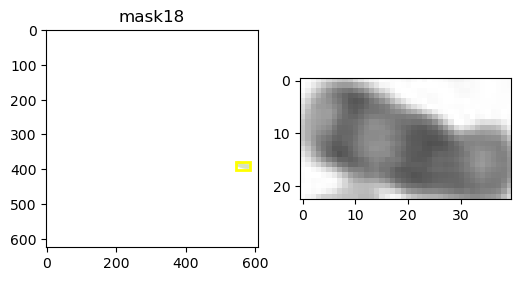

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask19
[334, 178, 110, 78]
[334, 444, 178, 256]


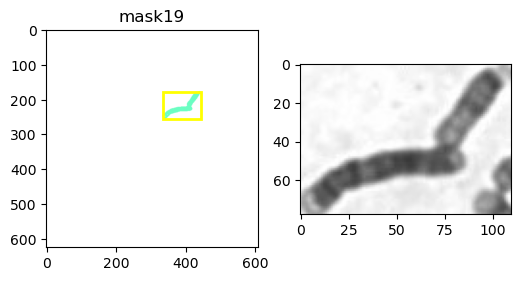

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask20
[521, 300, 49, 44]
[521, 570, 300, 344]


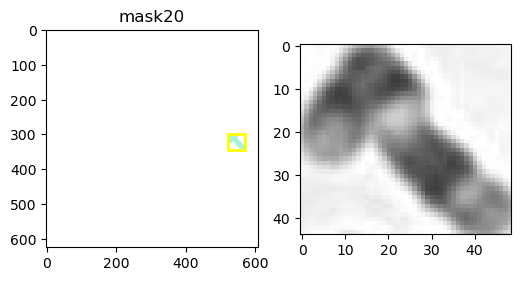

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask21
[402, 89, 35, 24]
[402, 437, 89, 113]


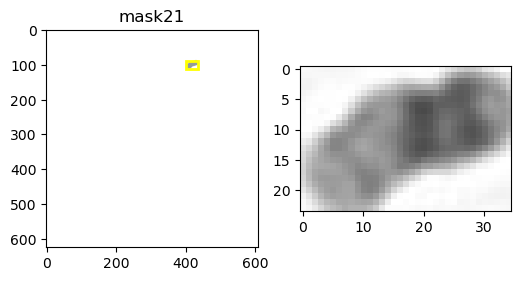

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask22
[411, 359, 94, 48]
[411, 505, 359, 407]


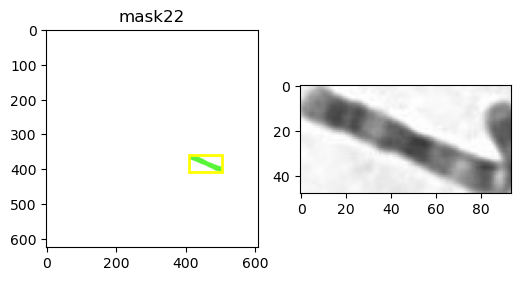

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask23
[470, 438, 48, 78]
[470, 518, 438, 516]


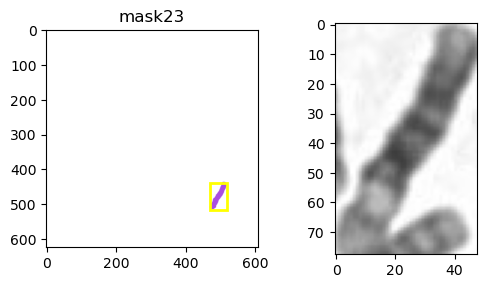

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask24
[226, 368, 35, 84]
[226, 261, 368, 452]


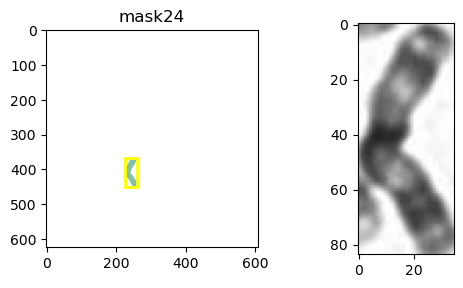

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask25
[438, 421, 35, 76]
[438, 473, 421, 497]


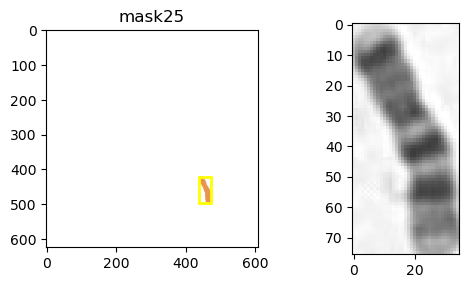

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask26
[88, 138, 16, 49]
[88, 104, 138, 187]


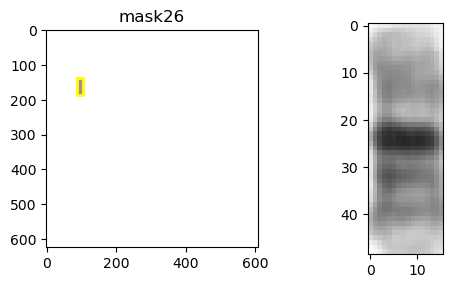

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask27
[406, 301, 37, 21]
[406, 443, 301, 322]


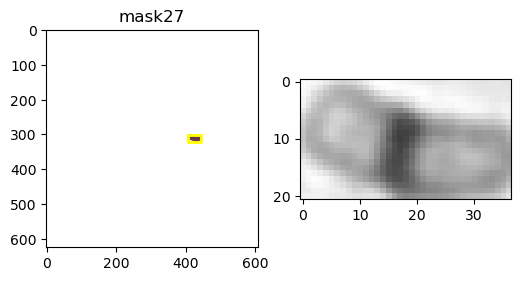

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask28
[25, 164, 59, 46]
[25, 84, 164, 210]


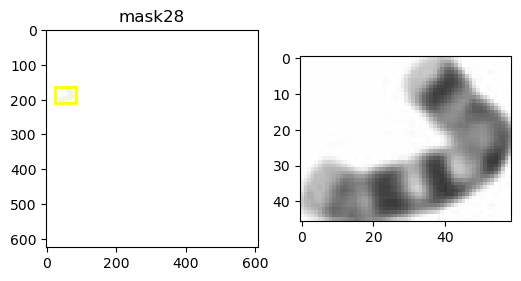

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask29
[239, 452, 69, 64]
[239, 308, 452, 516]


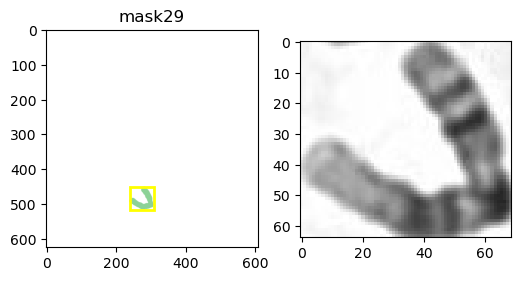

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask30
[449, 304, 20, 48]
[449, 469, 304, 352]


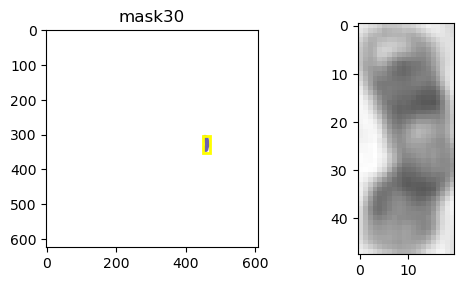

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask31
[511, 345, 50, 24]
[511, 561, 345, 369]


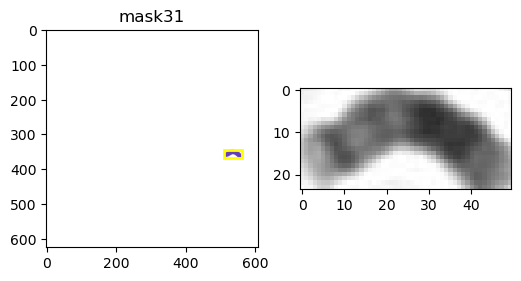

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask32
[237, 501, 277, 71]
[237, 514, 501, 572]


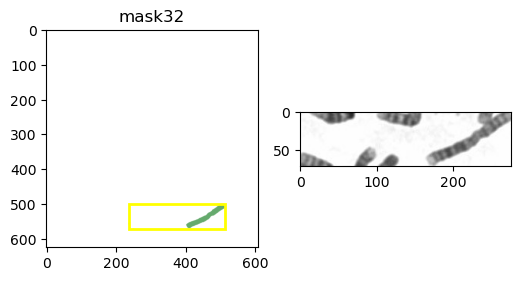

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask33
[201, 403, 32, 44]
[201, 233, 403, 447]


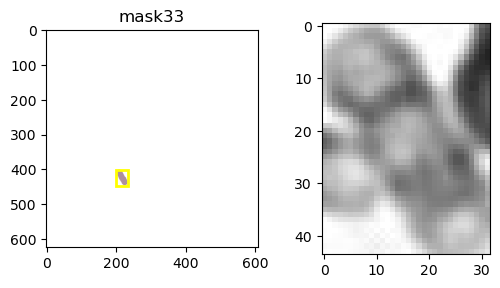

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask34
[434, 223, 65, 30]
[434, 499, 223, 253]


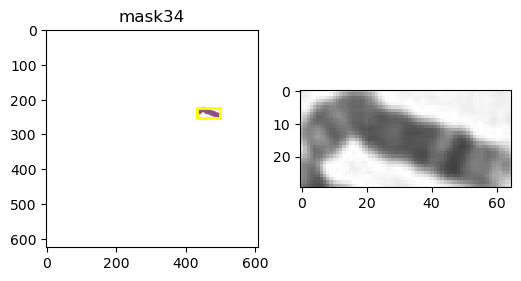

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask35
[404, 178, 41, 43]
[404, 445, 178, 221]


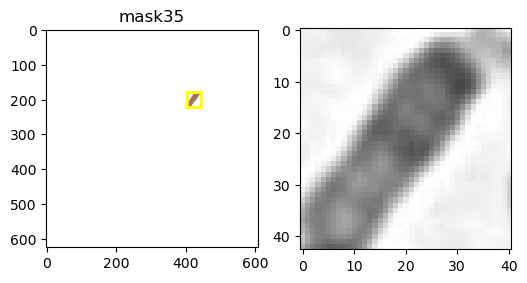

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask36
[227, 566, 26, 40]
[227, 253, 566, 606]


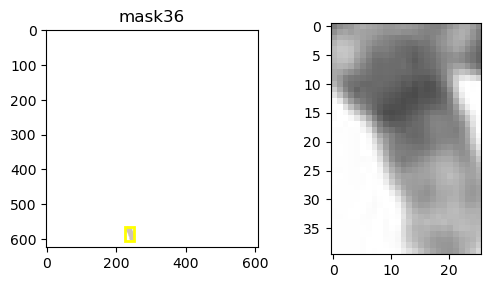

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask37
[424, 244, 55, 44]
[424, 479, 244, 288]


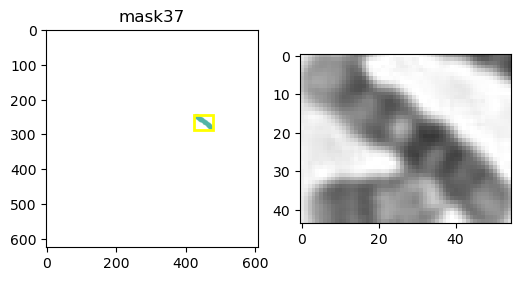

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask38
[335, 557, 30, 28]
[335, 365, 557, 585]


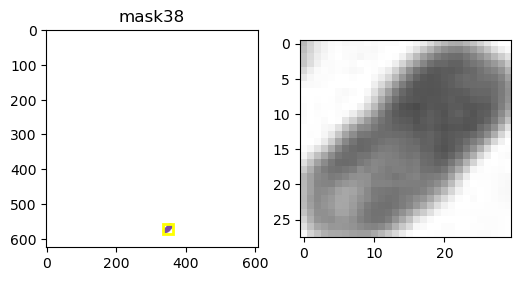

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask39
[493, 366, 67, 57]
[493, 560, 366, 423]


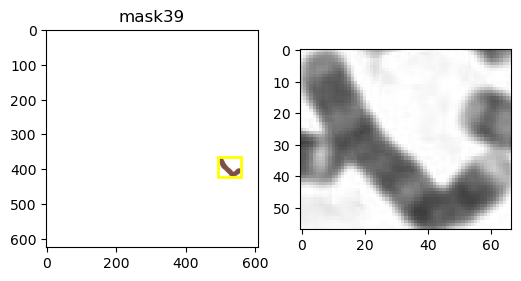

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask40
[426, 274, 35, 18]
[426, 461, 274, 292]


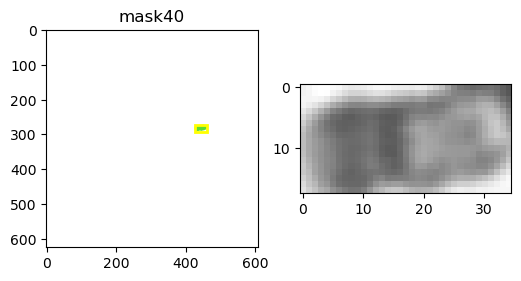

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask41
[202, 555, 51, 51]
[202, 253, 555, 606]


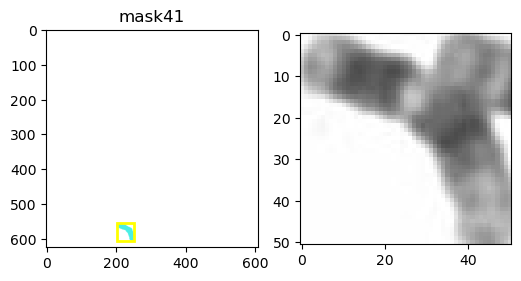

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask42
[334, 221, 85, 36]
[334, 419, 221, 257]


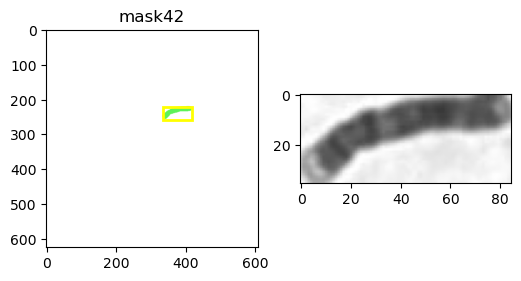

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask43
[226, 411, 35, 41]
[226, 261, 411, 452]


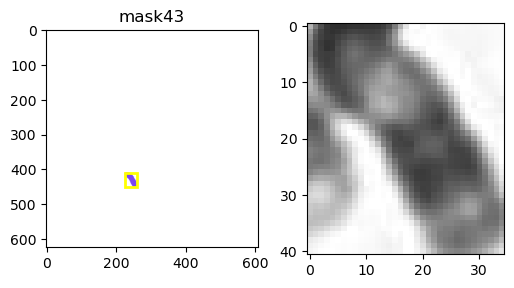

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask44
[521, 300, 28, 26]
[521, 549, 300, 326]


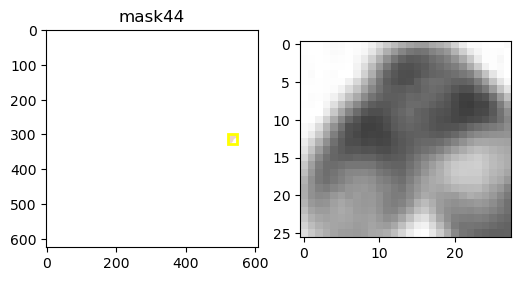

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask45
[149, 339, 21, 29]
[149, 170, 339, 368]


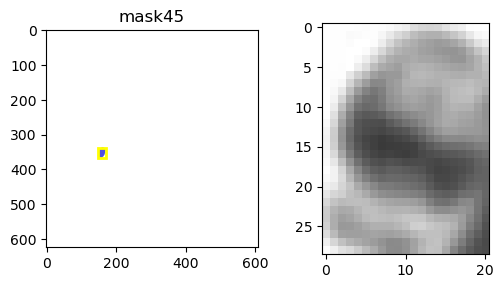

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask46
[402, 368, 116, 202]
[402, 518, 368, 570]


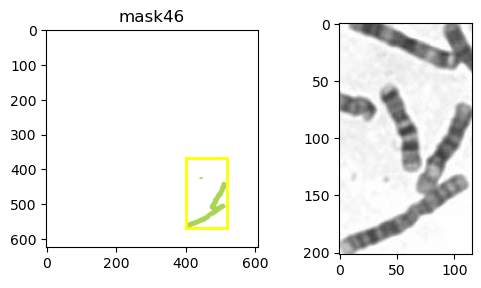

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask47
[176, 275, 25, 52]
[176, 201, 275, 327]


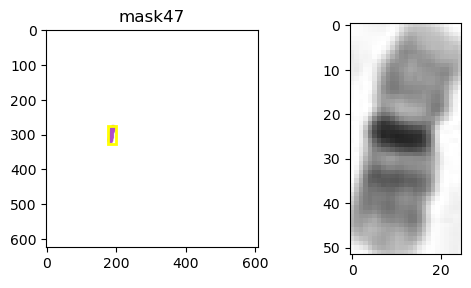

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask48
[453, 196, 26, 24]
[453, 479, 196, 220]


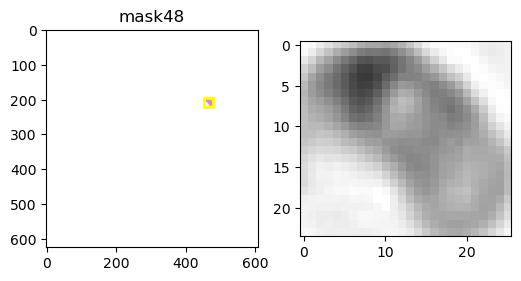

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask49
[25, 164, 79, 72]
[25, 104, 164, 236]


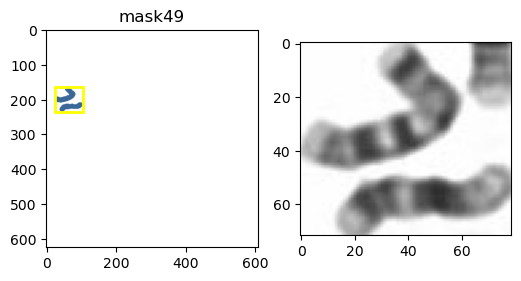

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask50
[229, 368, 30, 43]
[229, 259, 368, 411]


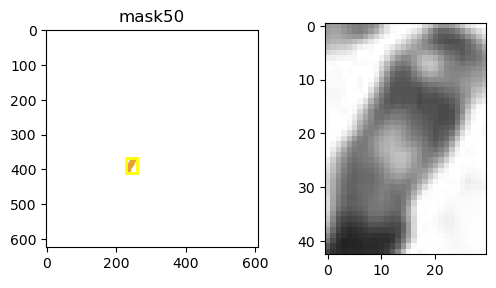

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask51
[181, 274, 20, 24]
[181, 201, 274, 298]


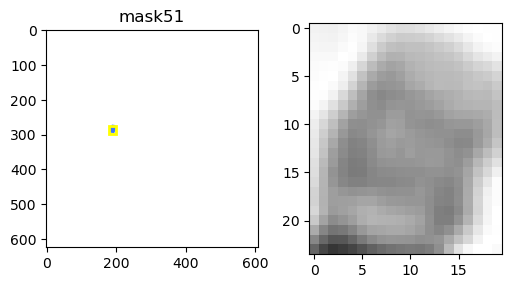

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask52
[88, 138, 16, 22]
[88, 104, 138, 160]


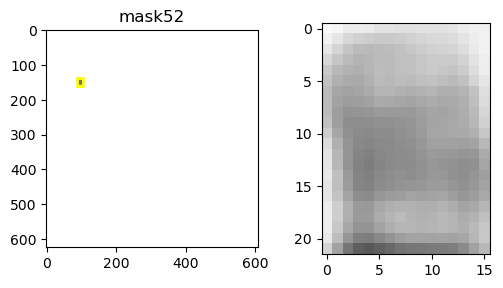

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask53
[537, 312, 33, 32]
[537, 570, 312, 344]


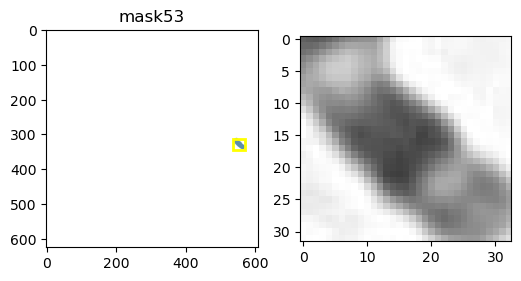

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask54
[150, 339, 89, 33]
[150, 239, 339, 372]


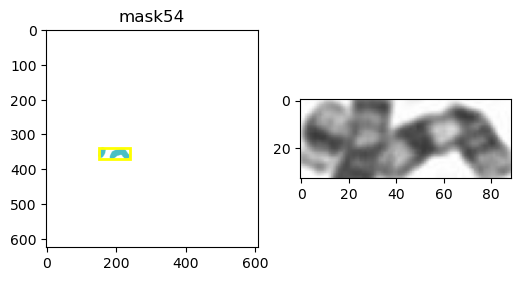

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask55
[434, 223, 65, 64]
[434, 499, 223, 287]


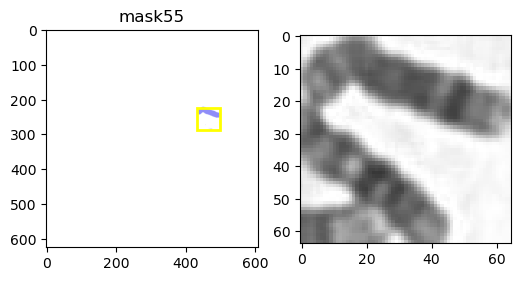

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask56
[406, 302, 63, 48]
[406, 469, 302, 350]


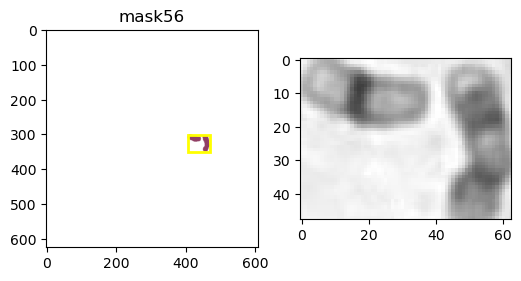

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask57
[403, 438, 115, 132]
[403, 518, 438, 570]


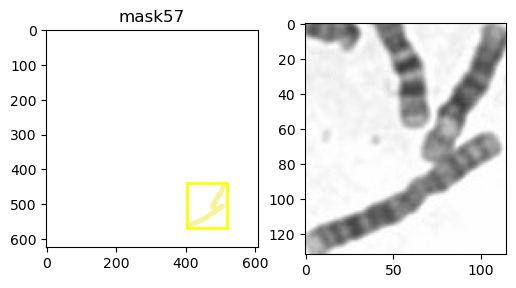

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask58
[60, 352, 54, 22]
[60, 114, 352, 374]


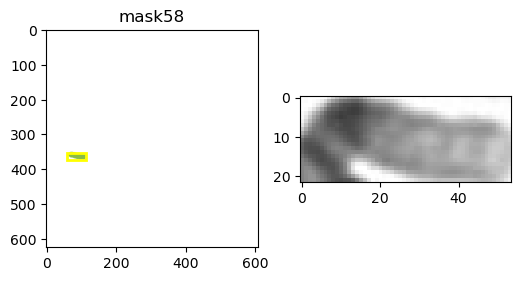

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask59
[272, 452, 34, 49]
[272, 306, 452, 501]


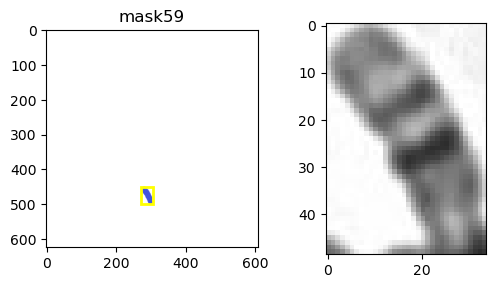

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask60
[400, 0, 31, 17]
[400, 431, 0, 17]


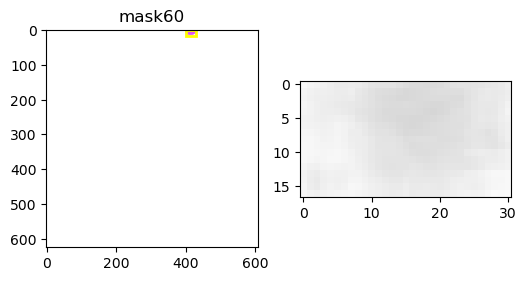

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask61
[167, 385, 44, 53]
[167, 211, 385, 438]


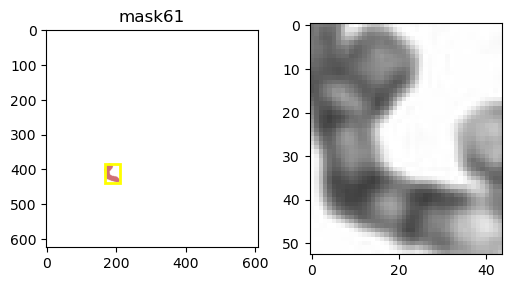

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask62
[183, 341, 56, 31]
[183, 239, 341, 372]


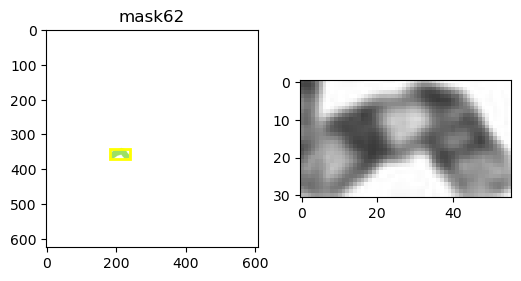

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask63
[234, 548, 101, 44]
[234, 335, 548, 592]


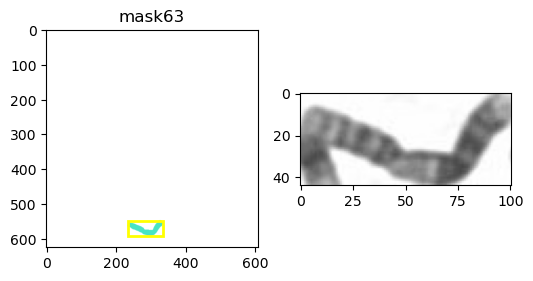

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask64
[411, 359, 148, 64]
[411, 559, 359, 423]


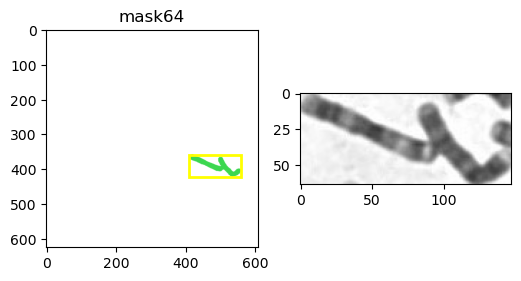

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask65
[48, 254, 43, 85]
[48, 91, 254, 339]


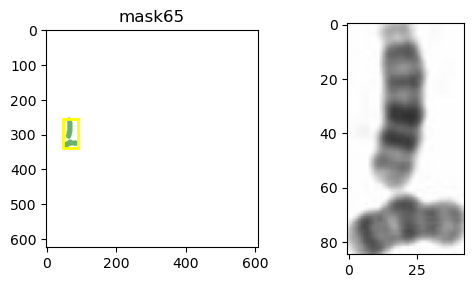

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask66
[450, 334, 16, 18]
[450, 466, 334, 352]


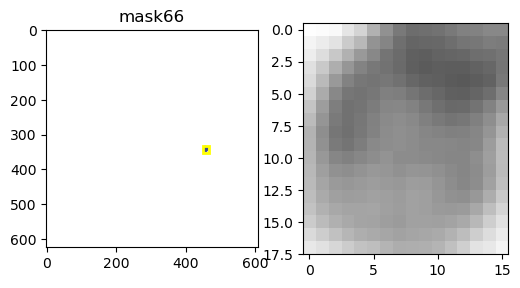

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask67
[239, 484, 68, 32]
[239, 307, 484, 516]


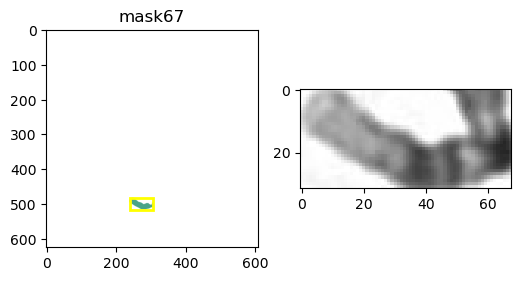

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask68
[534, 193, 27, 31]
[534, 561, 193, 224]


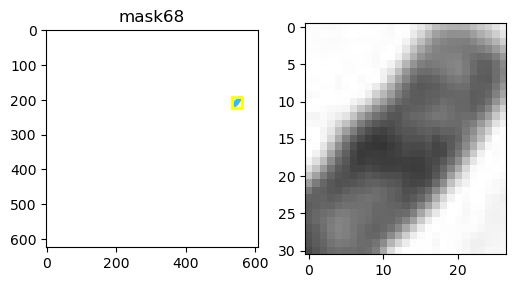

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask69
[234, 555, 49, 28]
[234, 283, 555, 583]


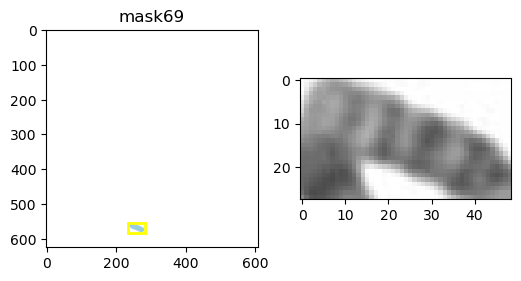

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask70
[526, 399, 34, 24]
[526, 560, 399, 423]


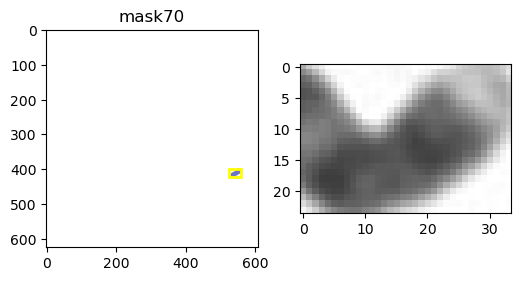

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask71
[493, 366, 43, 52]
[493, 536, 366, 418]


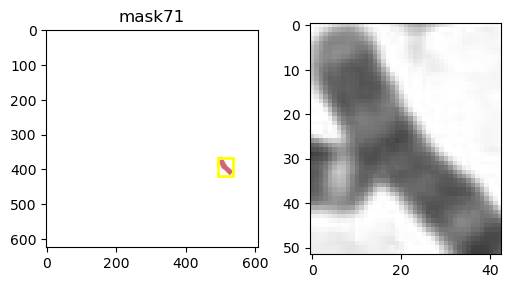

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask72
[25, 190, 49, 20]
[25, 74, 190, 210]


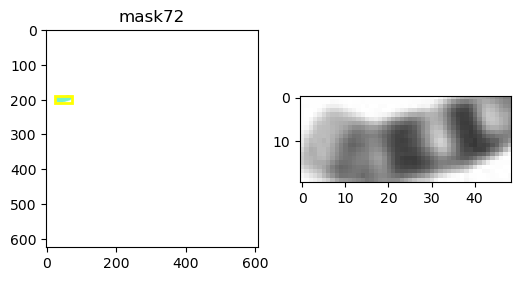

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask73
[54, 164, 30, 33]
[54, 84, 164, 197]


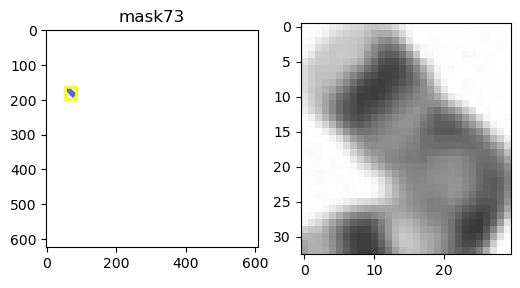

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask74
[114, 253, 22, 17]
[114, 136, 253, 270]


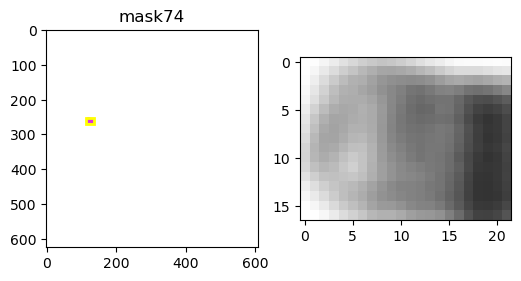

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask75
[202, 555, 29, 20]
[202, 231, 555, 575]


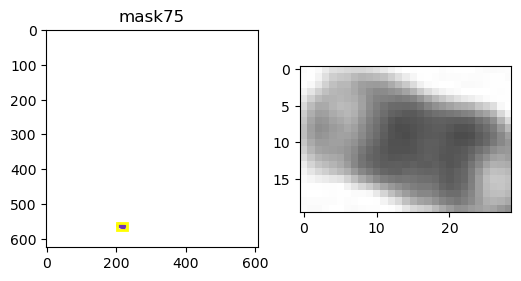

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask76
[88, 159, 16, 28]
[88, 104, 159, 187]


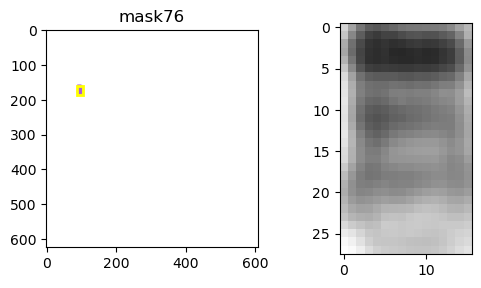

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask77
[320, 435, 16, 46]
[320, 336, 435, 481]


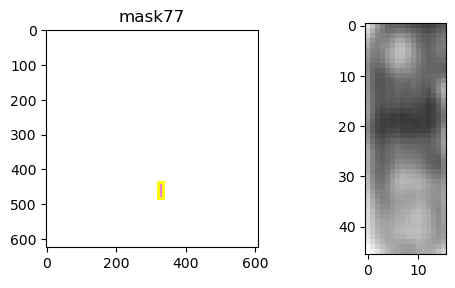

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask78
[137, 491, 38, 30]
[137, 175, 491, 521]


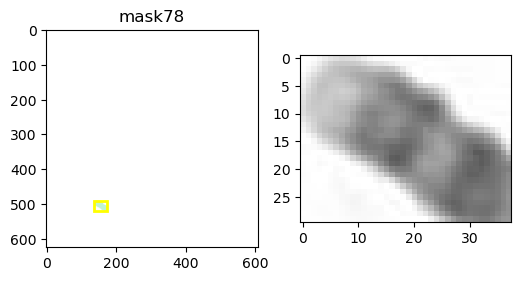

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask79
[176, 511, 27, 20]
[176, 203, 511, 531]


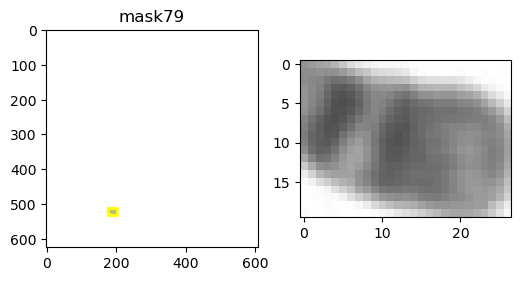

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask80
[176, 296, 18, 30]
[176, 194, 296, 326]


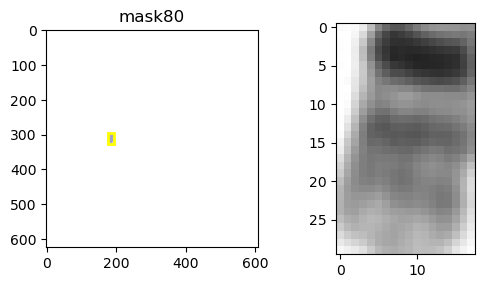

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask81
[552, 125, 11, 13]
[552, 563, 125, 138]


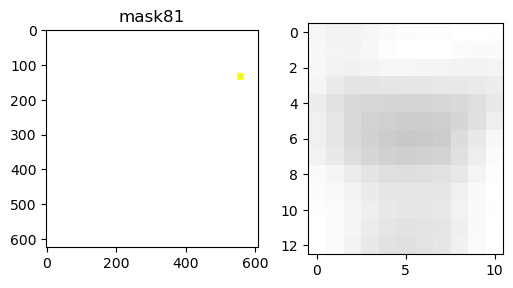

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask82
[561, 66, 3, 3]
[561, 564, 66, 69]


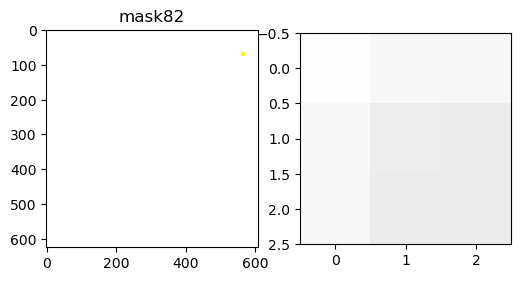

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask83
[202, 548, 133, 58]
[202, 335, 548, 606]


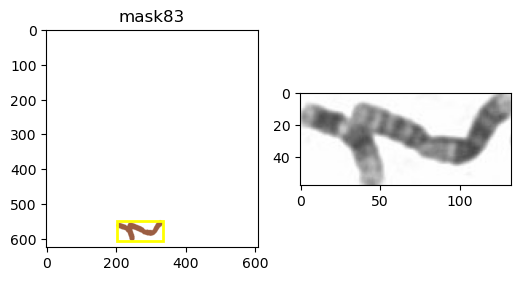

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask84
[385, 421, 87, 75]
[385, 472, 421, 496]


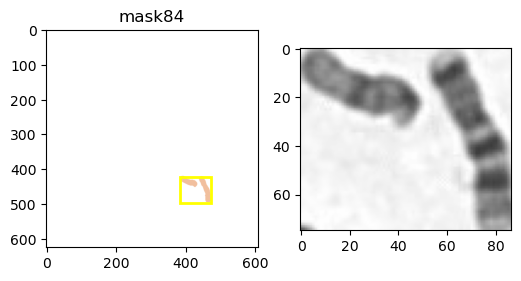

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask85
[213, 342, 26, 30]
[213, 239, 342, 372]


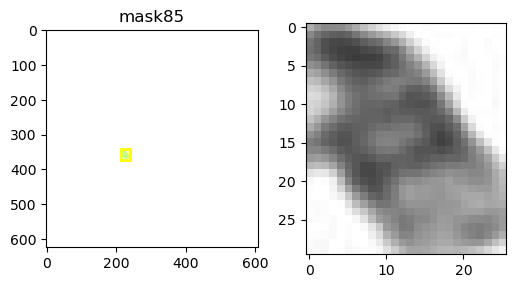

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask86
[521, 193, 40, 38]
[521, 561, 193, 231]


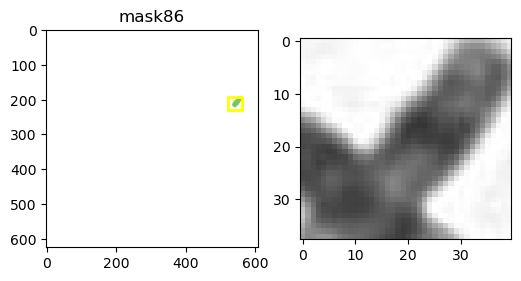

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask87
[91, 413, 16, 18]
[91, 107, 413, 431]


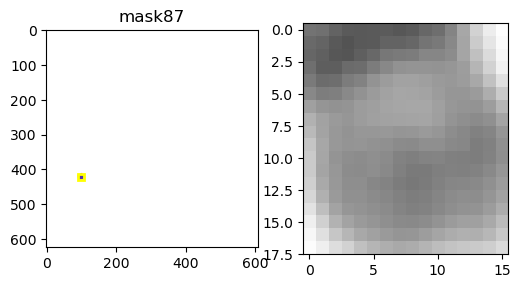

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mask88
[521, 441, 26, 21]
[521, 547, 441, 462]


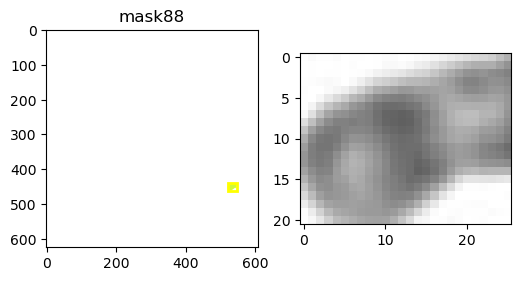

In [40]:
#show slices of masks1
for i in range(len(masks1)):
    fig, ax = plt.subplots(1,2,figsize=(6,3))
    ax[0].imshow(bgw)
    masksi=masks1[i]
    box0=masksi['bbox']
    xc,yc,w,h = box0
    x0=xc
    y0=yc
    x1=xc+w
    y1=yc+h
    print(f'mask{i}')
    print(box0)
    print([x0,x1,y0,y1])
    rect = patches.Rectangle( (xc,yc),w,h, linewidth=2, edgecolor='yellow', fill=False)
    
    boximage=image[y0:y1,x0:x1,:]
    cv2.imwrite(str(i).zfill(3)+'.png', boximage)
    
    show_anns([masksi],ax[0])
    ax[0].add_patch(rect)
    ax[1].imshow(boximage)
    ax[0].set_title(f'mask{i}') 
    plt.show()   

In [41]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
patha1='/Users/alirazi/Downloads/Data-2/24_chromosomes_object/annotations/103131.xml'
image = cv2.imread(path1)
tree = ET.parse(patha1)

In [52]:
for elem in tree.iter():
    if 'object' in elem.tag:
        for attr in list(elem):
            if 'name' in attr.tag:
                name = attr.text
            if 'bndbox' in attr.tag:
                for dim in list(attr):
                    if 'xmin' in dim.tag:
                        xmin = int(round(float(dim.text)))
                    if 'ymin' in dim.tag:
                        ymin = int(round(float(dim.text)))
                    if 'xmax' in dim.tag:
                        xmax = int(round(float(dim.text)))
                    if 'ymax' in dim.tag:
                        ymax = int(round(float(dim.text)))

                cv2.rectangle(image,(xmin,ymin),(xmax,ymax), (255,0,0),1)
                cv2.putText(image,name,(xmin+10, ymin+15),
                        cv2.FONT_HERSHEY_SIMPLEX, 1e-3*image.shape[0],(255,0,0),1)

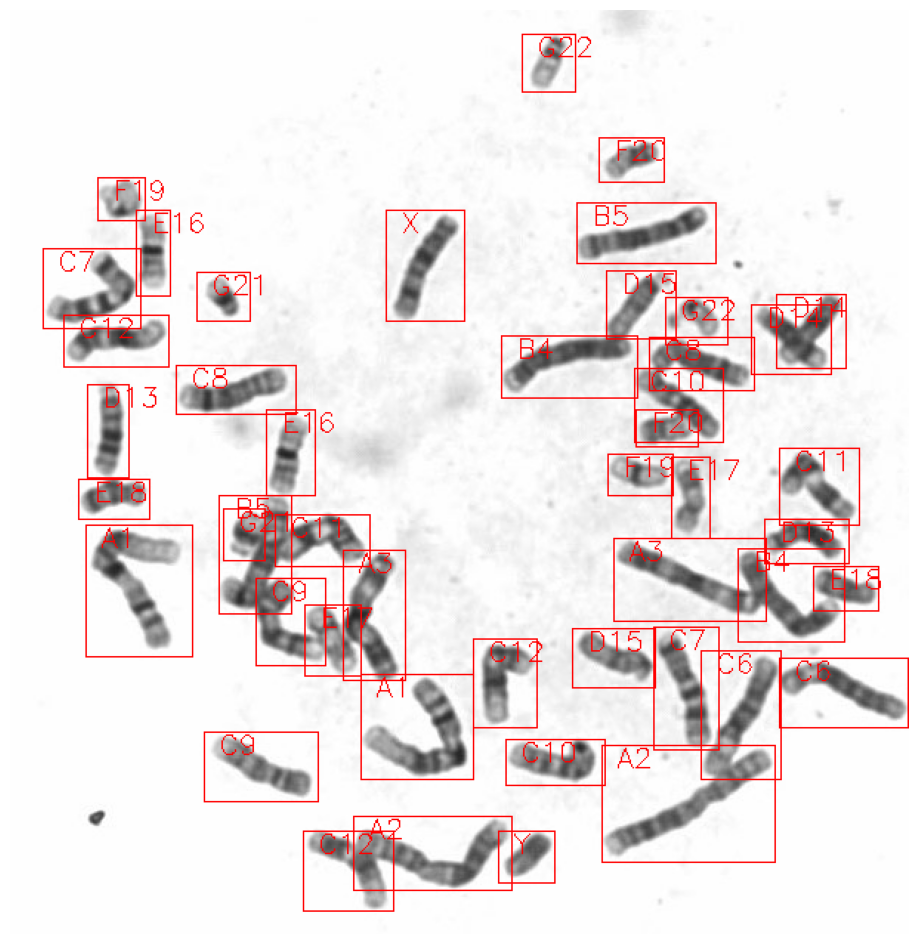

In [53]:
plt.figure(figsize=(12,12))
plt.imshow(image)
plt.axis('off') 
plt.show()

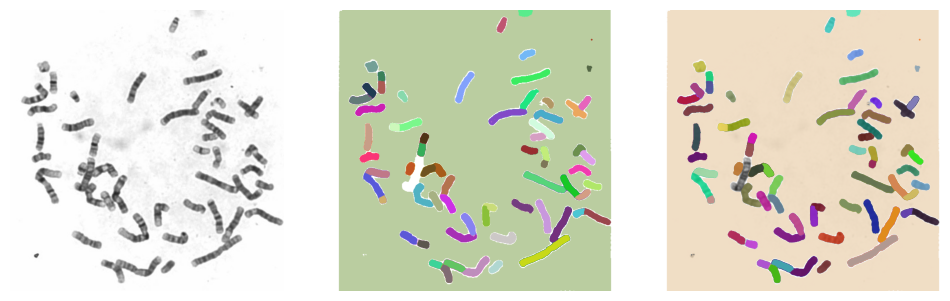

In [45]:
path2='/Users/alirazi/Downloads/Data-2/24_chromosomes_object/JEPG/1071221.jpg'
image = cv2.imread(path0)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#image = cv2.resize(image0,dsize=None,fx=0.1,fy=0.1)

masks1 = mask_generator1.generate(image)

fig, axs = plt.subplots(1,3,figsize=(12,4))
axs[0].imshow(image)
axs[2].imshow(image) 
show_anns(masks1,axs[1])
show_anns(masks1,axs[2])
axs[0].axis('off')
axs[1].axis('off')    
axs[2].axis('off')    
plt.show()

In [46]:
bgw=np.ones(image.shape)*255
print(len(masks1))
print(masks1[0].keys())


89
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


(625, 608, 3)


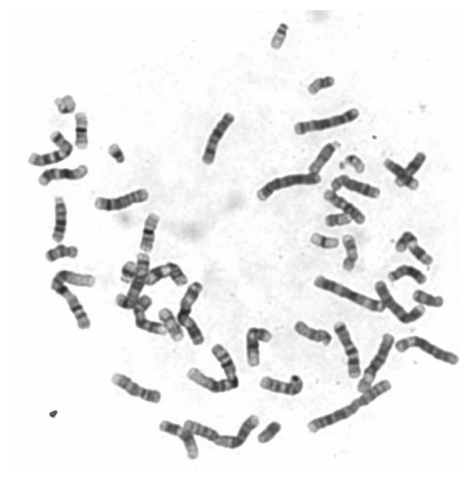

In [47]:
print(image.shape)
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.axis('off') 
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


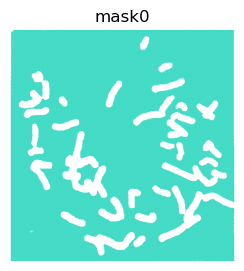

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


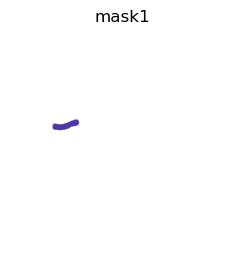

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


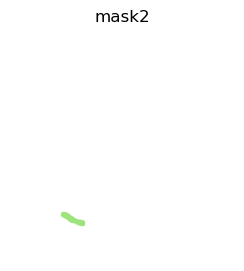

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


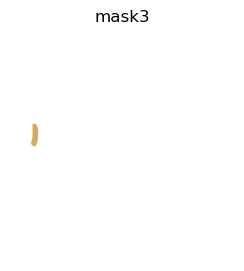

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


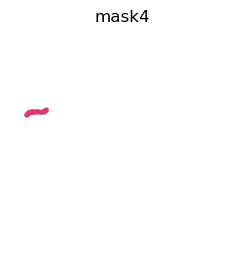

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


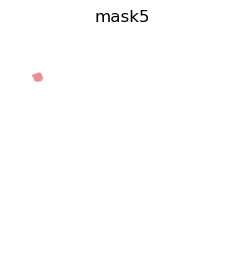

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


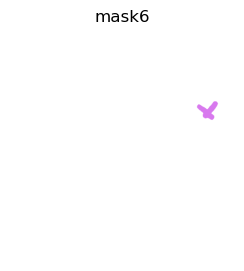

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


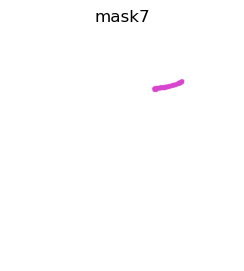

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


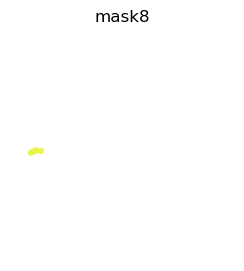

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


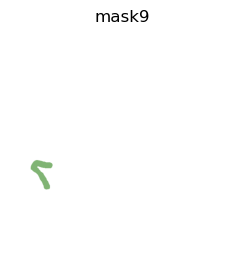

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


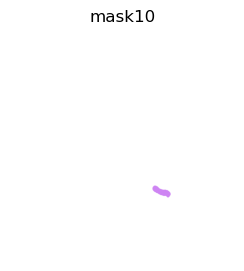

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


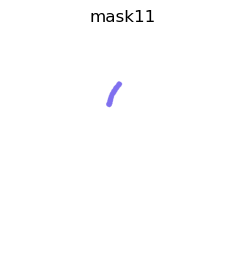

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


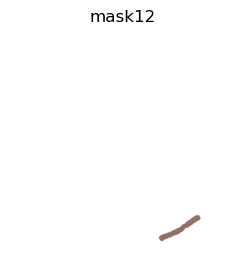

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


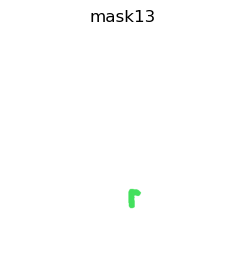

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


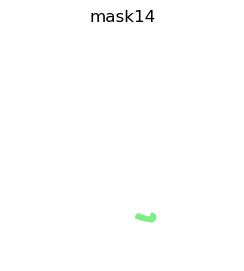

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


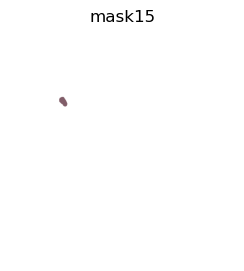

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


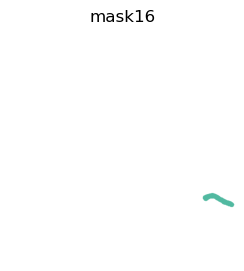

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


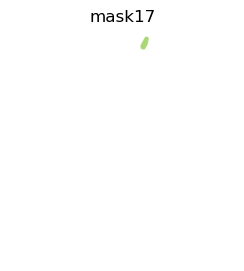

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


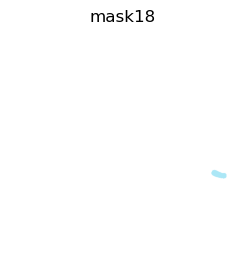

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


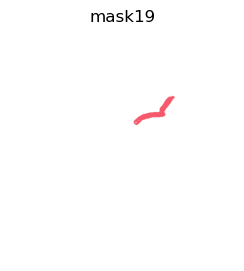

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


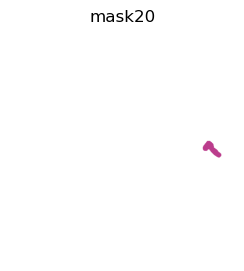

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


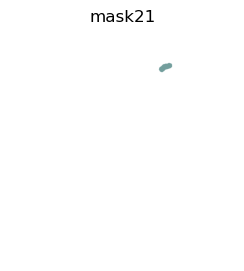

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


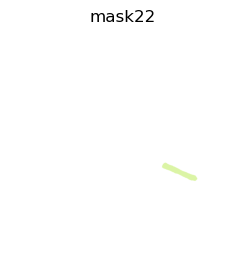

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


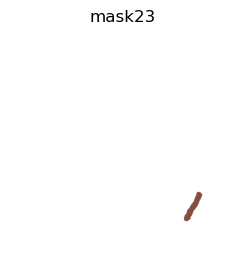

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


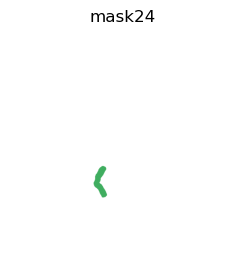

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


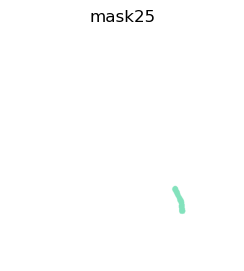

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


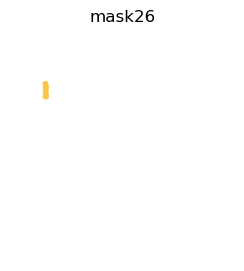

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


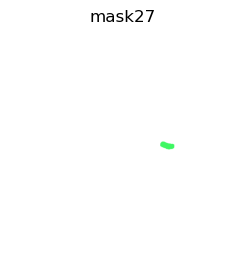

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


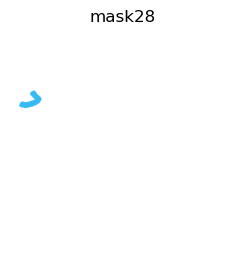

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


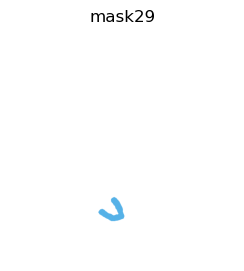

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


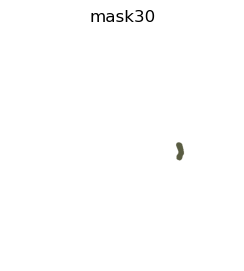

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


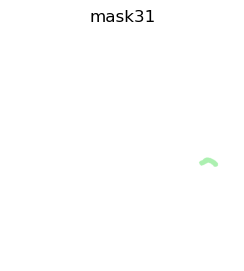

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


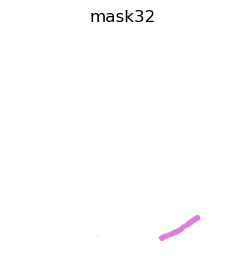

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


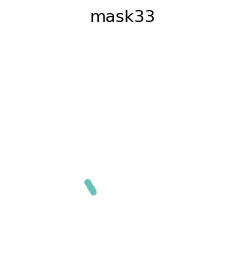

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


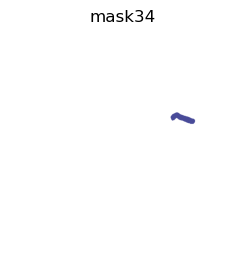

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


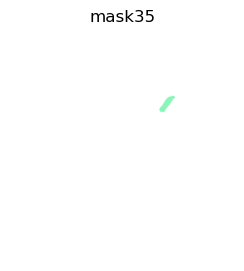

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


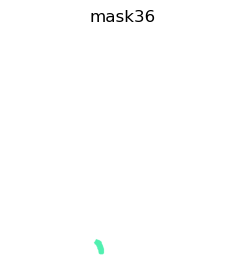

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


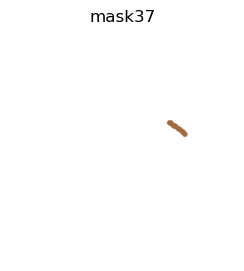

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


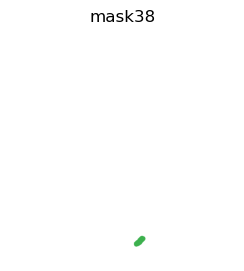

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


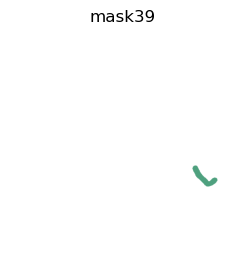

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


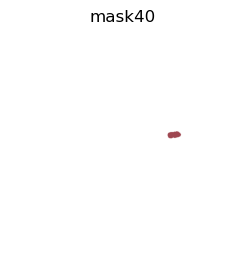

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


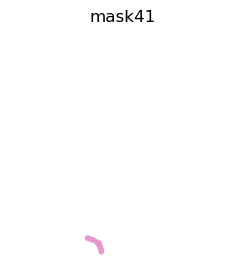

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


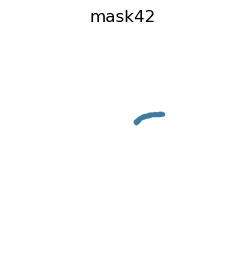

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


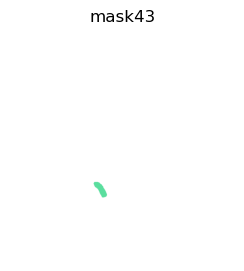

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


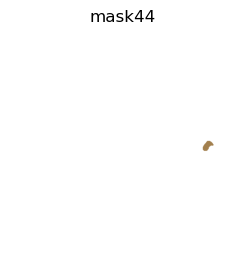

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


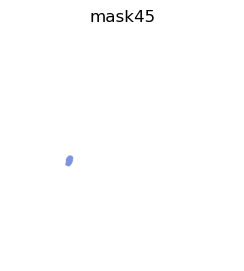

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


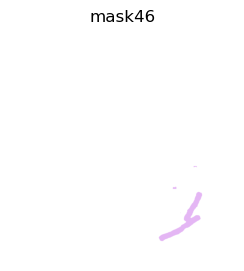

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


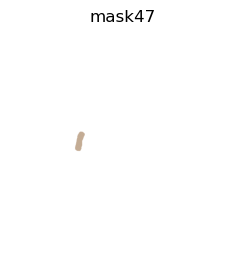

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


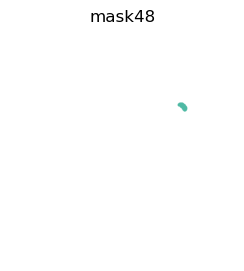

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


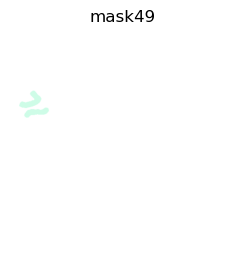

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


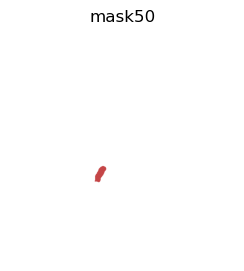

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


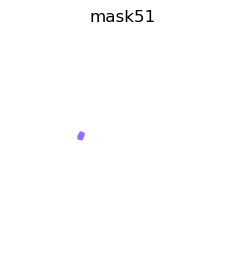

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


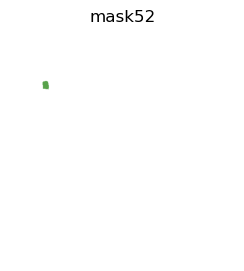

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


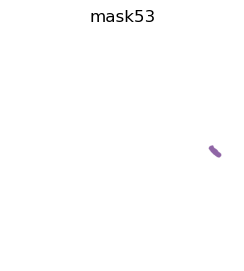

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


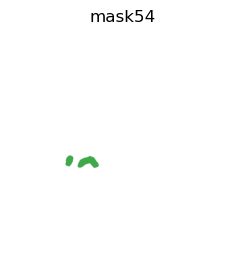

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


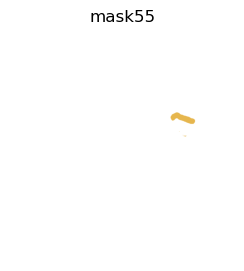

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


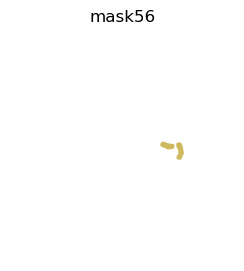

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


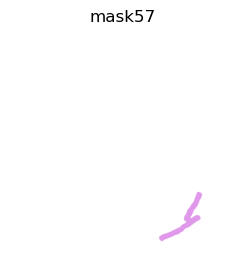

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


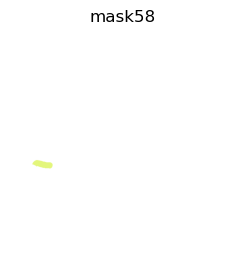

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


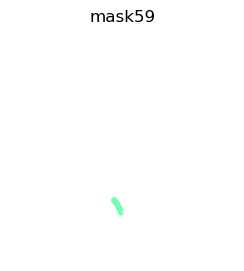

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


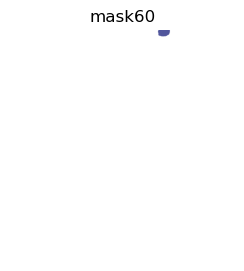

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


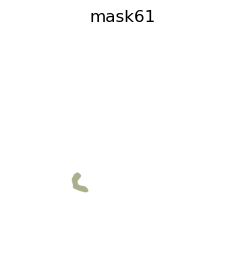

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


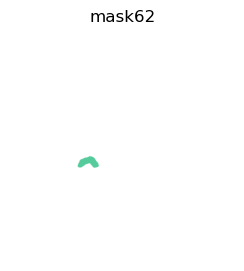

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


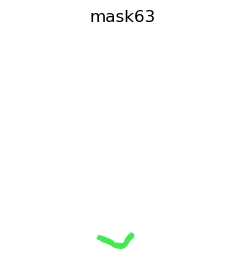

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


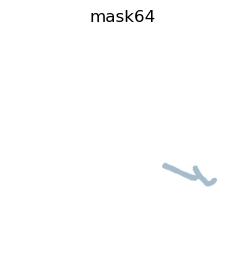

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


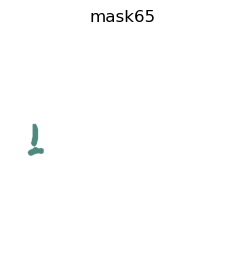

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


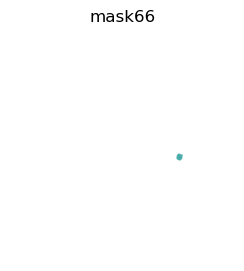

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


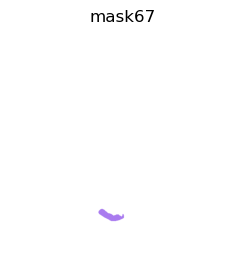

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


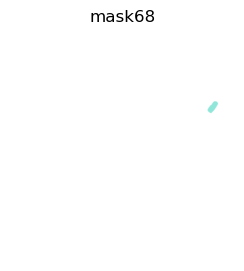

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


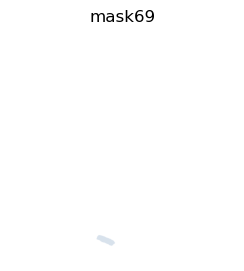

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


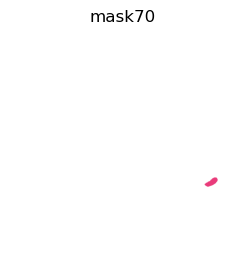

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


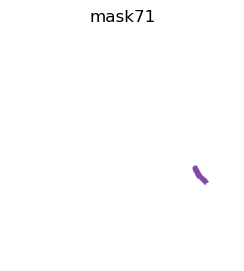

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


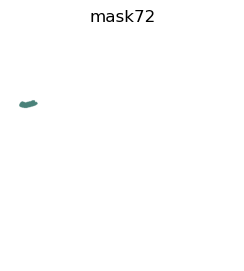

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


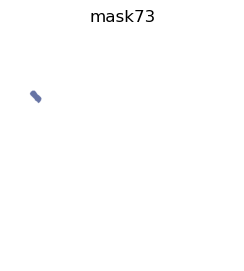

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


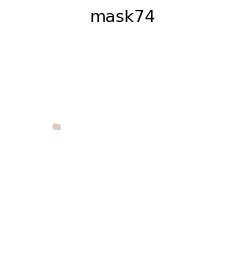

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


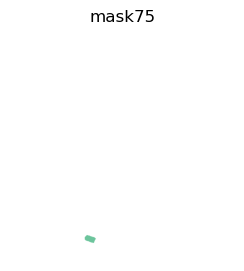

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


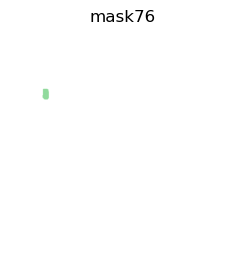

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


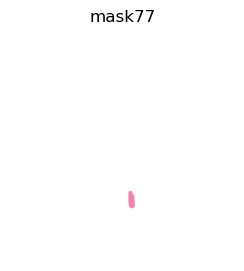

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


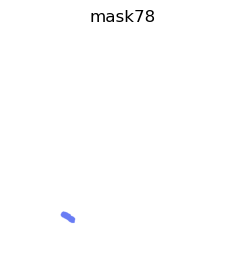

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


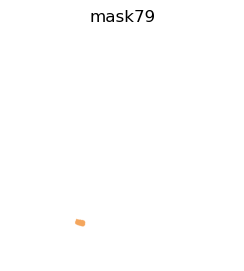

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


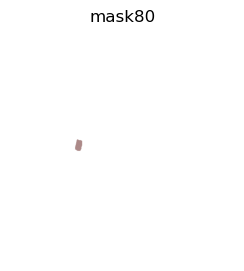

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


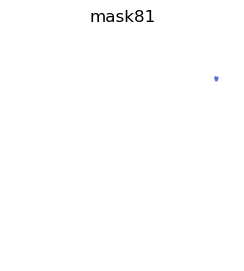

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


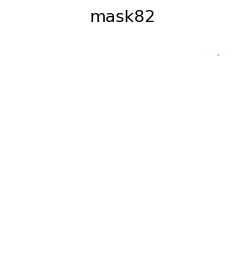

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


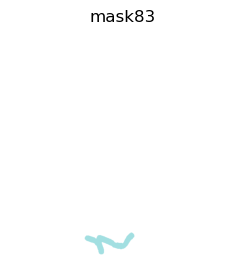

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


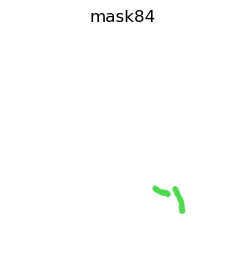

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


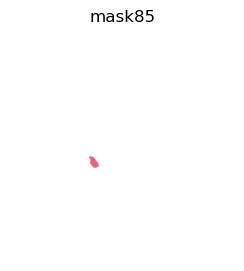

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


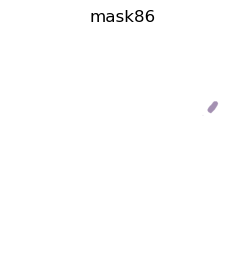

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


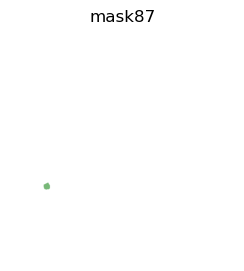

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


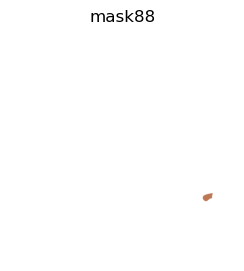

In [48]:
#slices of mask image
for i in range(len(masks1)):
    plt.figure(figsize=(3,3))
    plt.imshow(bgw)
    show_anns([masks1[i]])
    plt.title(f'mask{i}')
    plt.axis('off')  
    plt.show()  

In [49]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
patha2='/Users/alirazi/Downloads/Data-2/24_chromosomes_object/annotations/1071221.xml'
image = cv2.imread(path2)
tree = ET.parse(patha2)

In [55]:
for elem in tree.iter():
    if 'object' in elem.tag:
        for attr in list(elem):
            if 'name' in attr.tag:
                name = attr.text
            if 'bndbox' in attr.tag:
                for dim in list(attr):
                    if 'xmin' in dim.tag:
                        xmin = int(round(float(dim.text)))
                    if 'ymin' in dim.tag:
                        ymin = int(round(float(dim.text)))
                    if 'xmax' in dim.tag:
                        xmax = int(round(float(dim.text)))
                    if 'ymax' in dim.tag:
                        ymax = int(round(float(dim.text)))

                cv2.rectangle(image,(xmin,ymin),(xmax,ymax), (255,0,0),1)
                cv2.putText(image,name,(xmin+10, ymin+15),
                        cv2.FONT_HERSHEY_SIMPLEX, 1e-3*image.shape[0],(255,0,0),1)

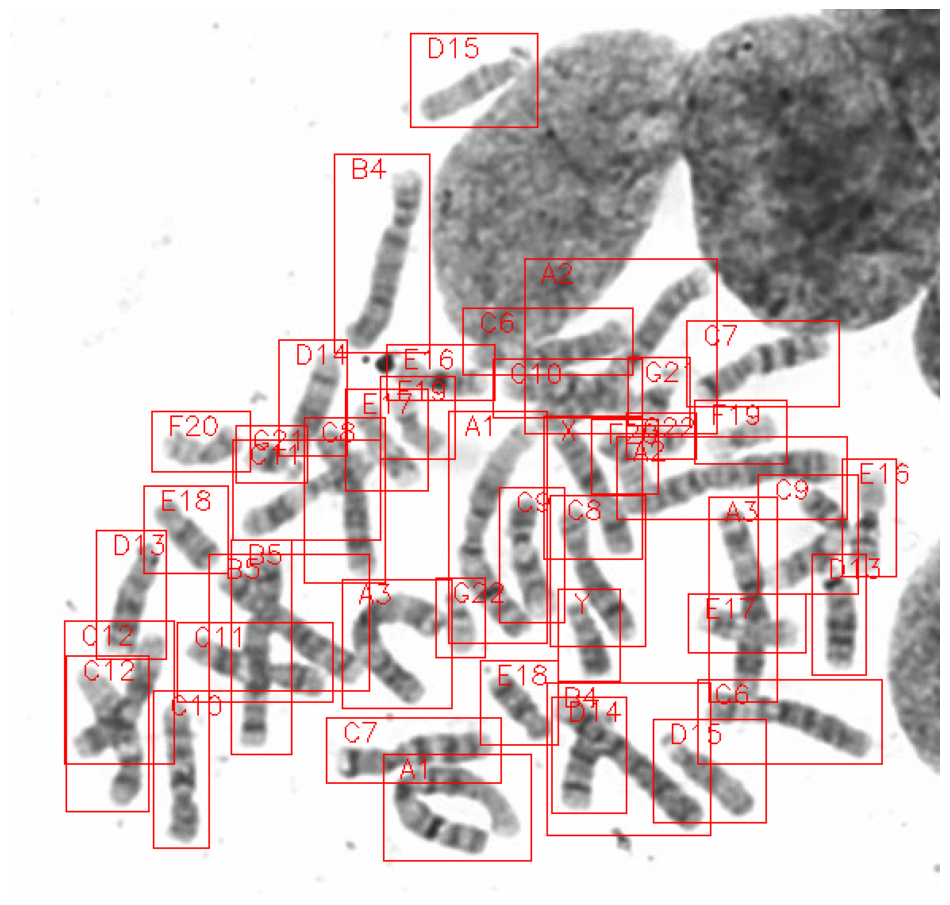

In [56]:
plt.figure(figsize=(12,12))
plt.imshow(image)
plt.axis('off') 
plt.show()

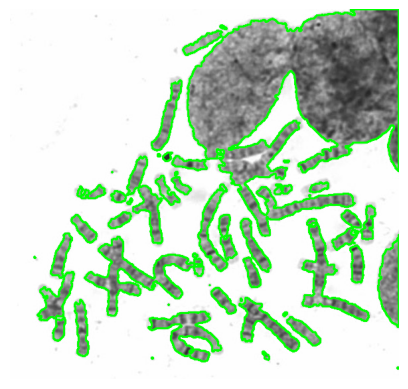

In [58]:
import cv2
import matplotlib.pyplot as plt

# Load the karyotype image
image = cv2.imread("/Users/alirazi/Downloads/Data-2/24_chromosomes_object/JEPG/1071221.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours of chromosomes
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
segmented_image = image.copy()
cv2.drawContours(segmented_image, contours, -1, (0, 255, 0), 2)

# Display the segmented image in the notebook
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis labels
plt.show()


In [59]:
import cv2

# Load the karyotype image
image = cv2.imread("/Users/alirazi/Downloads/Data-2/24_chromosomes_object/JEPG/1071221.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours of chromosomes
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
segmented_image = image.copy()
cv2.drawContours(segmented_image, contours, -1, (0, 255, 0), 2)

# Save or display the segmented image
cv2.imwrite("segmented_image.jpg", segmented_image)


True

In [62]:
import numpy as np

# Define a function to update chromosome orientation
def update_orientation(image, angle):
    # Perform rotation
    M = cv2.getRotationMatrix2D((image.shape[1] // 2, image.shape[0] // 2), angle, 1)
    updated_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return updated_image

# Specify the angle to correct orientation
angle = 90

# Update the orientation of the segmented chromosome
updated_chromosome = update_orientation(segmented_image, angle)


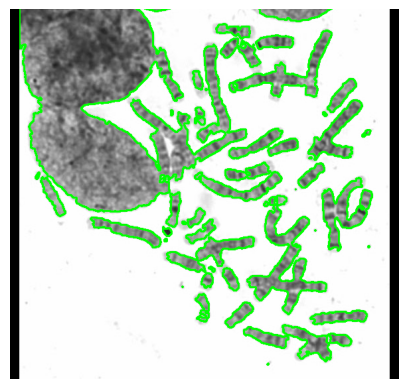

In [63]:
import matplotlib.pyplot as plt

# Define a function to update chromosome orientation
def update_orientation(image, angle):
    # Perform rotation
    M = cv2.getRotationMatrix2D((image.shape[1] // 2, image.shape[0] // 2), angle, 1)
    updated_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return updated_image

# Specify the angle to correct orientation
angle = 90

# Update the orientation of the segmented chromosome
updated_chromosome = update_orientation(segmented_image, angle)

# Display the updated chromosome image in the notebook
plt.imshow(cv2.cvtColor(updated_chromosome, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis labels
plt.show()


In [65]:
# Define a function to straighten chromosomes
def straighten_chromosome(image):
    # Implement straightening transformation
    # You may need to adapt this transformation based on your specific data
    straightened_image = image  # Placeholder for the actual transformation
    return straightened_image

# Apply straightening to the segmented chromosome
straightened_chromosome = straighten_chromosome(segmented_image)


In [66]:
# Define a function to extract features
def extract_features(image):
    # Implement feature extraction (e.g., size, shape, texture)
    # You can use image analysis techniques, OpenCV, or scikit-image for this step
    features = {}  # Store extracted features in a dictionary
    return features

# Extract features from the straightened chromosome
chromosome_features = extract_features(straightened_chromosome)


In [1]:
# Define a function to extract features
def extract_features(image):
    # Implement feature extraction (e.g., size, shape, texture)
    # You can use image analysis techniques, OpenCV, or scikit-image for this step
    features = {}  # Store extracted features in a dictionary
    return features

# Extract features from the straightened chromosome
chromosome_features = extract_features(straightened_chromosome)

# Print the extracted features
print(chromosome_features)


NameError: name 'straightened_chromosome' is not defined